In [0]:
# need this to run on GPU
! pip3 install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
! pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [0]:
import argparse
import os
import numpy as np
import math
import itertools

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from PIL import Image
import pandas as pd

import torchvision.utils as vutils

import cv2
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# paths
base_dir = "drive/My Drive/"
cil_project_path = "/content/drive/My Drive/CIL_project/"
save_path = cil_project_path + "HIST_check/"


In [0]:
# get scored.zip stuff
zip_scored = 'scored.zip'

# path after unzipping on colab
path_scored = zip_scored[:-4] + '/'

# path on drive
path_scored_drive = cil_project_path + zip_scored

# unzip
! cp '{path_scored_drive}' . 
! unzip -q '{zip_scored}'
! rm '{zip_scored}'

# just a check because sometimes it gets stuck
print('ok')

replace scored/8225396.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
ok


In [0]:
# number of images in scored
! ls -l '{path_scored}'| grep -v ^l | wc -l

9601


In [0]:
# get query.zip stuff
zip_query = 'query.zip'

# path after unzip on colab
path_query = zip_query[:-4] + '/'

# path on drive
path_query_drive = cil_project_path + zip_query

# unzip
! cp '{path_query_drive}' . 
! unzip -q '{zip_query}'
! rm '{zip_query}'

# just a check because sometimes it gets stuck
print('ok')

replace query/5867953.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
ok


In [0]:
# number of images in query
! ls -l '{path_query}'| grep -v ^l | wc -l

1201


In [0]:
# get csv for scored
csv_name = 'scored.csv'
csv_path = csv_name
csv_drive_path = cil_project_path + csv_name

! cp '{csv_drive_path}' . 

           Actual
Id               
5694059  1.837794
9129611  0.002067
8058479  4.588517
1315360  2.325835
6813515  0.872309
...           ...
1639624  1.653025
4342102  1.279719
6526641  1.308388
9655842  3.697500
6771742  1.430689

[9600 rows x 1 columns]


Actual    6.249791
dtype: float64

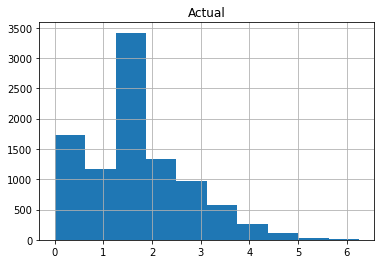

In [0]:
scores = pd.read_csv(csv_path, index_col="Id")

print(scores)
scores.hist()
scores.max()

# Create dataset
The generated csv file has columns: 

|  Id  |  Actual  |  0  |  1  |  2  | ... |  255  | 


In [0]:
# Columns of the dataset
# hisogram has values between 0-255 
colors = list(range(256))
cols = ['Id', 'Actual']
cols.extend(colors)

print(cols)

['Id', 'Actual', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [0]:
df = pd.DataFrame(columns=cols)
df.set_index('Id')

print(df)

Empty DataFrame
Columns: [Id, Actual, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, ...]
Index: []

[0 rows x 258 columns]


In [0]:
count = 0
percent = int(len(scores.index) * 0.01) # used to display how much of the 
                                        # dataset has been processed

for index, row in scores.iterrows():
  img_path = os.path.join(path_scored, str(index) + ".png") 

  # load image
  img = cv2.imread(img_path, 0)

  # create histogram
  hist = cv2.calcHist([img],[0],None,[256],[0,256])

  # calcHist returns nparray so convert it to list
  hist = hist.tolist()

  # conversion creates a list of lists => make a simple list 
  # to add easier to dataset
  flatten = [val for sublist in hist for val in sublist]

  # add score
  flatten.insert(0, row["Actual"]) 

  # add Id
  flatten.insert(0, index) 

  # create new row
  this_row = pd.DataFrame([flatten], columns=cols)

  # append new entry to the final dataset
  df = df.append(this_row)

  count = count + 1  
  if(count % percent == 0):
    print("... Done " + str(count / percent) + "%")

... Done 1.0%
... Done 2.0%
... Done 3.0%
... Done 4.0%
... Done 5.0%
... Done 6.0%
... Done 7.0%
... Done 8.0%
... Done 9.0%
... Done 10.0%
... Done 11.0%
... Done 12.0%
... Done 13.0%
... Done 14.0%
... Done 15.0%
... Done 16.0%
... Done 17.0%
... Done 18.0%
... Done 19.0%
... Done 20.0%
... Done 21.0%
... Done 22.0%
... Done 23.0%
... Done 24.0%
... Done 25.0%
... Done 26.0%
... Done 27.0%
... Done 28.0%
... Done 29.0%
... Done 30.0%
... Done 31.0%
... Done 32.0%
... Done 33.0%
... Done 34.0%
... Done 35.0%
... Done 36.0%
... Done 37.0%
... Done 38.0%
... Done 39.0%
... Done 40.0%
... Done 41.0%
... Done 42.0%
... Done 43.0%
... Done 44.0%
... Done 45.0%
... Done 46.0%
... Done 47.0%
... Done 48.0%
... Done 49.0%
... Done 50.0%
... Done 51.0%
... Done 52.0%
... Done 53.0%
... Done 54.0%
... Done 55.0%
... Done 56.0%
... Done 57.0%
... Done 58.0%
... Done 59.0%
... Done 60.0%
... Done 61.0%
... Done 62.0%
... Done 63.0%
... Done 64.0%
... Done 65.0%
... Done 66.0%
... Done 67.0%
... 

In [0]:
df

,Id,Actual,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,5694059,1.837794,998064.0,932.0,280.0,185.0,108.0,82.0,47.0,28.0,43.0,29.0,23.0,15.0,8.0,12.0,8.0,8.0,6.0,3.0,8.0,12.0,1.0,1.0,1.0,1.0,3.0,4.0,5.0,2.0,2.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,1.0
0,9129611,0.002067,541874.0,41577.0,40813.0,39288.0,37760.0,35726.0,33371.0,30939.0,28236.0,25807.0,22597.0,20125.0,17474.0,15198.0,12935.0,10981.0,9158.0,7650.0,6220.0,5027.0,3999.0,3140.0,2433.0,1931.0,1470.0,1108.0,783.0,607.0,483.0,316.0,232.0,151.0,113.0,90.0,60.0,47.0,38.0,26.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0,8058479,4.588517,2.0,997302.0,1559.0,390.0,184.0,104.0,62.0,44.0,35.0,33.0,18.0,15.0,17.0,15.0,12.0,11.0,8.0,7.0,11.0,5.0,8.0,3.0,2.0,6.0,6.0,3.0,2.0,3.0,1.0,2.0,3.0,2.0,3.0,1.0,0.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,1.0,2.0,3.0,7.0,2.0,4.0,0.0,1.0
0,1315360,2.325835,3.0,2.0,996601.0,2048.0,476.0,207.0,129.0,78.0,60.0,36.0,37.0,33.0,24.0,16.0,17.0,13.0,10.0,15.0,7.0,4.0,9.0,7.0,4.0,3.0,4.0,3.0,3.0,7.0,3.0,1.0,3.0,2.0,4.0,4.0,0.0,3.0,1.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,5.0,8.0,2.0,4.0,1.0
0,6813515,0.872309,3.0,8.0,996391.0,2238.0,486.0,192.0,106.0,77.0,47.0,43.0,34.0,19.0,23.0,22.0,18.0,9.0,14.0,12.0,12.0,8.0,10.0,8.0,8.0,1.0,4.0,3.0,0.0,4.0,3.0,2.0,4.0,2.0,3.0,3.0,3.0,2.0,2.0,4.0,...,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,2.0,6.0,0.0,2.0,6.0,0.0,5.0,1.0,2.0,3.0,0.0,2.0,0.0,0.0,3.0,3.0,6.0,11.0,6.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1639624,1.653025,975141.0,21498.0,1164.0,517.0,252.0,194.0,140.0,102.0,83.0,65.0,58.0,47.0,54.0,35.0,42.0,40.0,23.0,20.0,26.0,21.0,24.0,15.0,13.0,13.0,8.0,6.0,22.0,14.0,12.0,9.0,9.0,7.0,11.0,13.0,5.0,10.0,13.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,5.0,6.0,3.0,7.0,1.0,1.0,1.0
0,4342102,1.279719,998441.0,728.0,220.0,123.0,75.0,69.0,41.0,35.0,27.0,17.0,19.0,18.0,13.0,9.0,5.0,7.0,7.0,11.0,7.0,5.0,1.0,5.0,3.0,5.0,1.0,6.0,1.0,4.0,2.0,5.0,1.0,1.0,3.0,1.0,2.0,5.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
0,6526641,1.308388,9.0,4.0,1124.0,997013.0,764.0,252.0,138.0,96.0,57.0,43.0,53.0,30.0,25.0,26.0,22.0,9.0,12.0,9.0,11.0,8.0,6.0,15.0,17.0,10.0,8.0,8.0,10.0,5.0,9.0,2.0,1.0,8.0,5.0,3.0,4.0,6.0,3.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,3.0,1.0,7.0,3.0,1.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0,4.0,4.0,5.0,4.0,7.0,1.0,1.0
0,9655842,3.697500,997249.0,1174.0,419.0,229.0,141.0,117.0,79.0,47.0,48.0,43.0,37.0,26.0,25.0,23.0,15.0,16.0,12.0,10.0,13.0,10.0,11.0,12.0,3.0,9.0,5.0,2.0,4.0,2.0,4.0,11.0,6.0,5.0,6.0,4.0,1.0,3.0,3.0,3.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,0.0,4.0,1.0,0.0,5.0,5.0,4.0,1.0,0.0,1.0


In [0]:
# create csv from dataframe
csv_name = cil_project_path + "scored_histograms.csv"
df.to_csv(csv_name)

Histograms features for images in query folder


Columns are: Id | Actual | 0 | 1 | ... | 255 | 

For images on query, in the "Actual" column, the value is -1 

In [0]:
from os import listdir
from os.path import isfile, join

In [0]:
mypath = 'query/'

# get Id of the images in query folder
files = [f[:-4] for f in listdir(mypath) if isfile(join(mypath, f))]

In [0]:
files

['8042027',
 '2679287',
 '6664898',
 '8523812',
 '6478640',
 '7170640',
 '7188259',
 '1687602',
 '9463639',
 '2401695',
 '6707439',
 '7095833',
 '8510664',
 '6967726',
 '2060968',
 '8822052',
 '5884667',
 '4170565',
 '1524169',
 '2578851',
 '3407630',
 '5470184',
 '3616311',
 '6971772',
 '6053796',
 '1982436',
 '9302616',
 '4179149',
 '6816578',
 '4248068',
 '1534047',
 '6427320',
 '4612888',
 '8085983',
 '9222313',
 '9418197',
 '4400864',
 '2113110',
 '9589596',
 '5051324',
 '4742705',
 '1974981',
 '3513636',
 '1914315',
 '9451167',
 '4145779',
 '2299386',
 '2824799',
 '5477192',
 '1416067',
 '7388128',
 '5852789',
 '4596268',
 '5077138',
 '8556360',
 '1925134',
 '8218313',
 '3634999',
 '5500115',
 '5393346',
 '9879364',
 '7887227',
 '5716082',
 '5281921',
 '2951152',
 '7074776',
 '5033848',
 '2466353',
 '8472746',
 '8874192',
 '3320238',
 '4404226',
 '8289363',
 '4398442',
 '9952702',
 '8557873',
 '6439886',
 '5147136',
 '4413250',
 '6785837',
 '7862504',
 '4842010',
 '1290640',
 '59

In [0]:
df_query = pd.DataFrame(columns=cols)
df_query.set_index('Id')
print(df_query)

Empty DataFrame
Columns: [Id, Actual, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, ...]
Index: []

[0 rows x 258 columns]


In [0]:
count = 0
percent = int(len(files) * 0.01)

for index in files:
  img_path = os.path.join(path_query, str(index) + ".png")

  # load image
  img = cv2.imread(img_path, 0)

  # create histogram
  hist = cv2.calcHist([img],[0],None,[256],[0,256])

  # calcHist returns nparray so convert it to list
  hist = hist.tolist()

  # conversion creates a list of lists => make a simple list 
  # to add easier to dataset
  flatten = [val for sublist in hist for val in sublist]

  # add score
  flatten.insert(0, -1) 

  # add Id
  flatten.insert(0, index) 

  # new row
  this_row = pd.DataFrame([flatten], columns=cols)

  # add new row to dataframe
  df_query = df_query.append(this_row)

  count = count + 1 
  if(count % percent == 0):
    print("... Done " + str(count / percent) + "%") 

... Done 1.0%
... Done 2.0%
... Done 3.0%
... Done 4.0%
... Done 5.0%
... Done 6.0%
... Done 7.0%
... Done 8.0%
... Done 9.0%
... Done 10.0%
... Done 11.0%
... Done 12.0%
... Done 13.0%
... Done 14.0%
... Done 15.0%
... Done 16.0%
... Done 17.0%
... Done 18.0%
... Done 19.0%
... Done 20.0%
... Done 21.0%
... Done 22.0%
... Done 23.0%
... Done 24.0%
... Done 25.0%
... Done 26.0%
... Done 27.0%
... Done 28.0%
... Done 29.0%
... Done 30.0%
... Done 31.0%
... Done 32.0%
... Done 33.0%
... Done 34.0%
... Done 35.0%
... Done 36.0%
... Done 37.0%
... Done 38.0%
... Done 39.0%
... Done 40.0%
... Done 41.0%
... Done 42.0%
... Done 43.0%
... Done 44.0%
... Done 45.0%
... Done 46.0%
... Done 47.0%
... Done 48.0%
... Done 49.0%
... Done 50.0%
... Done 51.0%
... Done 52.0%
... Done 53.0%
... Done 54.0%
... Done 55.0%
... Done 56.0%
... Done 57.0%
... Done 58.0%
... Done 59.0%
... Done 60.0%
... Done 61.0%
... Done 62.0%
... Done 63.0%
... Done 64.0%
... Done 65.0%
... Done 66.0%
... Done 67.0%
... 

In [0]:
df_query

,Id,Actual,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,8042027,-1,995632.0,2562.0,666.0,323.0,175.0,116.0,94.0,73.0,45.0,35.0,29.0,22.0,18.0,13.0,8.0,7.0,14.0,11.0,9.0,9.0,10.0,3.0,4.0,6.0,8.0,5.0,4.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0,3.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,2679287,-1,994022.0,3882.0,646.0,301.0,186.0,116.0,93.0,78.0,55.0,38.0,43.0,27.0,23.0,28.0,18.0,20.0,19.0,11.0,15.0,15.0,7.0,15.0,15.0,11.0,14.0,7.0,9.0,5.0,9.0,8.0,6.0,5.0,8.0,9.0,7.0,3.0,1.0,2.0,...,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,4.0,1.0,1.0,1.0,6.0,6.0,11.0,2.0,0.0,2.0,2.0,1.0
0,6664898,-1,469416.0,30789.0,30884.0,30277.0,30335.0,30048.0,29084.0,27954.0,27332.0,26155.0,24672.0,23547.0,21935.0,20941.0,19494.0,17988.0,16326.0,15074.0,13741.0,12364.0,10978.0,9759.0,8758.0,7846.0,6729.0,5843.0,5164.0,4327.0,3803.0,3288.0,2671.0,2305.0,1823.0,1544.0,1301.0,1052.0,881.0,729.0,...,3.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0,0.0,4.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,1.0,0.0,3.0,0.0,17.0
0,8523812,-1,531388.0,30885.0,30726.0,30260.0,29318.0,28118.0,27109.0,26128.0,24969.0,23755.0,22094.0,20896.0,19275.0,17792.0,16559.0,14889.0,13571.0,12397.0,10862.0,9723.0,8757.0,7689.0,6614.0,5636.0,5031.0,4372.0,3678.0,3091.0,2631.0,2100.0,1776.0,1502.0,1261.0,987.0,832.0,668.0,506.0,441.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,10.0
0,6478640,-1,2.0,996011.0,2520.0,437.0,181.0,126.0,71.0,67.0,33.0,36.0,23.0,16.0,28.0,20.0,13.0,9.0,20.0,10.0,9.0,12.0,9.0,9.0,10.0,7.0,5.0,5.0,6.0,7.0,4.0,11.0,8.0,6.0,7.0,2.0,3.0,4.0,2.0,3.0,...,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0,3.0,3.0,1.0,2.0,0.0,1.0,2.0,3.0,4.0,5.0,5.0,1.0,3.0,5.0,6.0,18.0,2.0,0.0,2.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5055625,-1,2.0,994287.0,3860.0,556.0,269.0,150.0,98.0,78.0,52.0,38.0,31.0,35.0,29.0,21.0,16.0,24.0,13.0,9.0,12.0,9.0,9.0,13.0,14.0,10.0,13.0,3.0,5.0,6.0,3.0,4.0,4.0,5.0,2.0,6.0,6.0,4.0,2.0,4.0,...,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,2.0,0.0,1.0,1.0,5.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,8.0,4.0,3.0,3.0,1.0,8.0,6.0,20.0,9.0,1.0,1.0,4.0,1.0
0,2340431,-1,998507.0,763.0,235.0,128.0,78.0,35.0,30.0,13.0,14.0,16.0,5.0,9.0,5.0,8.0,7.0,9.0,2.0,1.0,3.0,5.0,2.0,0.0,6.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,0.0,2.0,1.0,2.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,5.0,0.0,0.0,1.0,1.0
0,5211460,-1,561594.0,60019.0,57157.0,53572.0,48226.0,42984.0,36933.0,31743.0,26012.0,20848.0,16325.0,12602.0,9566.0,6911.0,5027.0,3566.0,2311.0,1577.0,1084.0,673.0,421.0,271.0,137.0,89.0,61.0,36.0,17.0,13.0,15.0,8.0,13.0,3.0,4.0,5.0,9.0,3.0,3.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
0,5695430,-1,1.0,997313.0,1398.0,392.0,182.0,122.0,91.0,48.0,48.0,30.0,34.0,23.0,20.0,18.0,14.0,9.0,16.0,8.0,12.0,6.0,12.0,4.0,8.0,9.0,7.0,5.0,3.0,2.0,3.0,8.0,3.0,3.0,1.0,3.0,2.0,4.0,1.0,1.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1

In [0]:
# create csv from dataframe
csv_name = cil_project_path + "query_histograms.csv"
df_query.to_csv(csv_name)

Analyse how histograms for various scores look like
note: results are uploaded on polybox for report if necessary

=== Score is  0
9129611


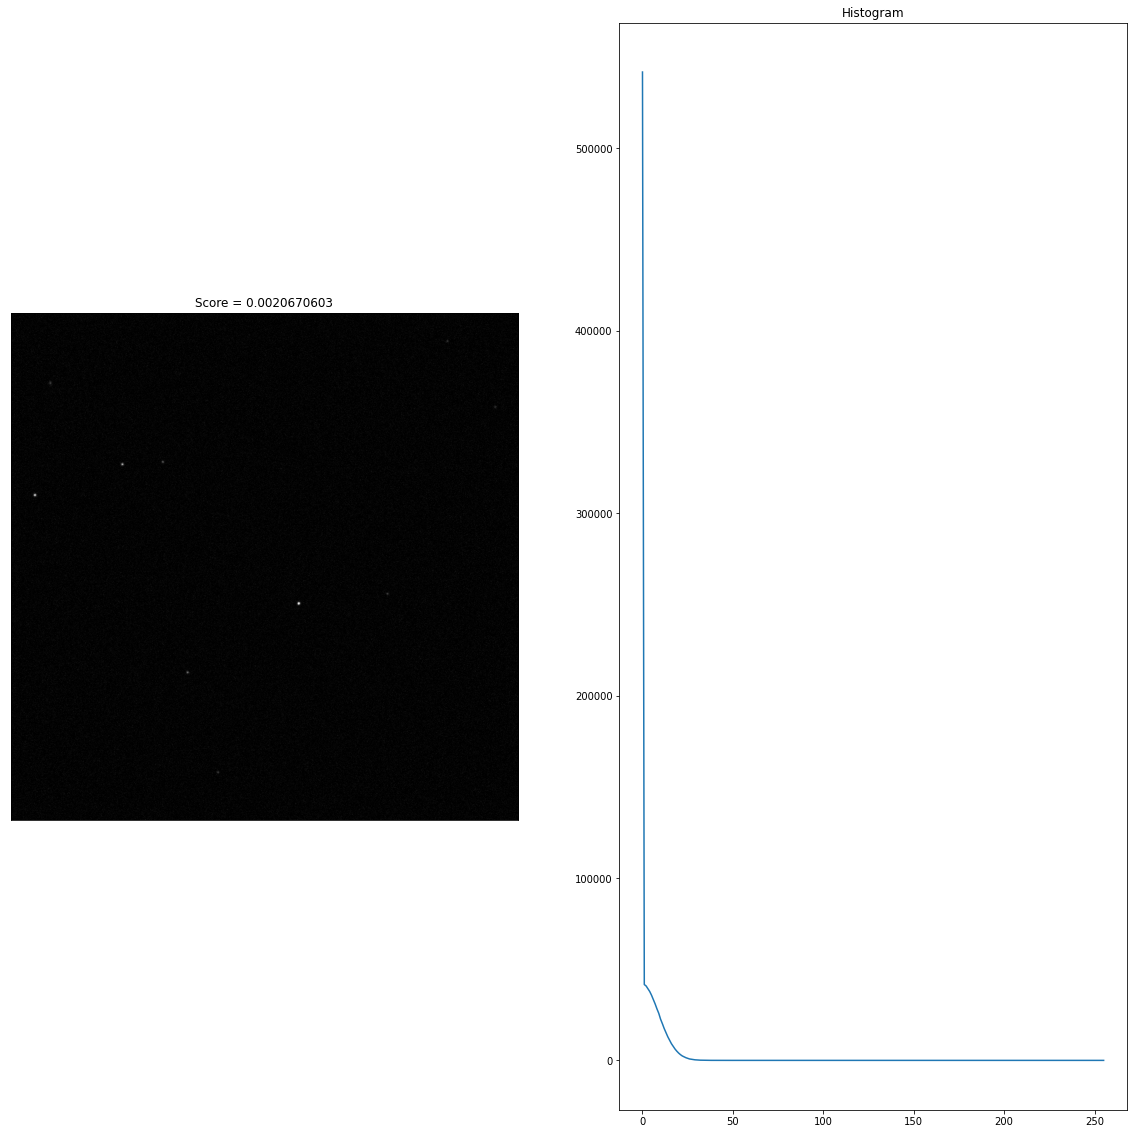

6813515


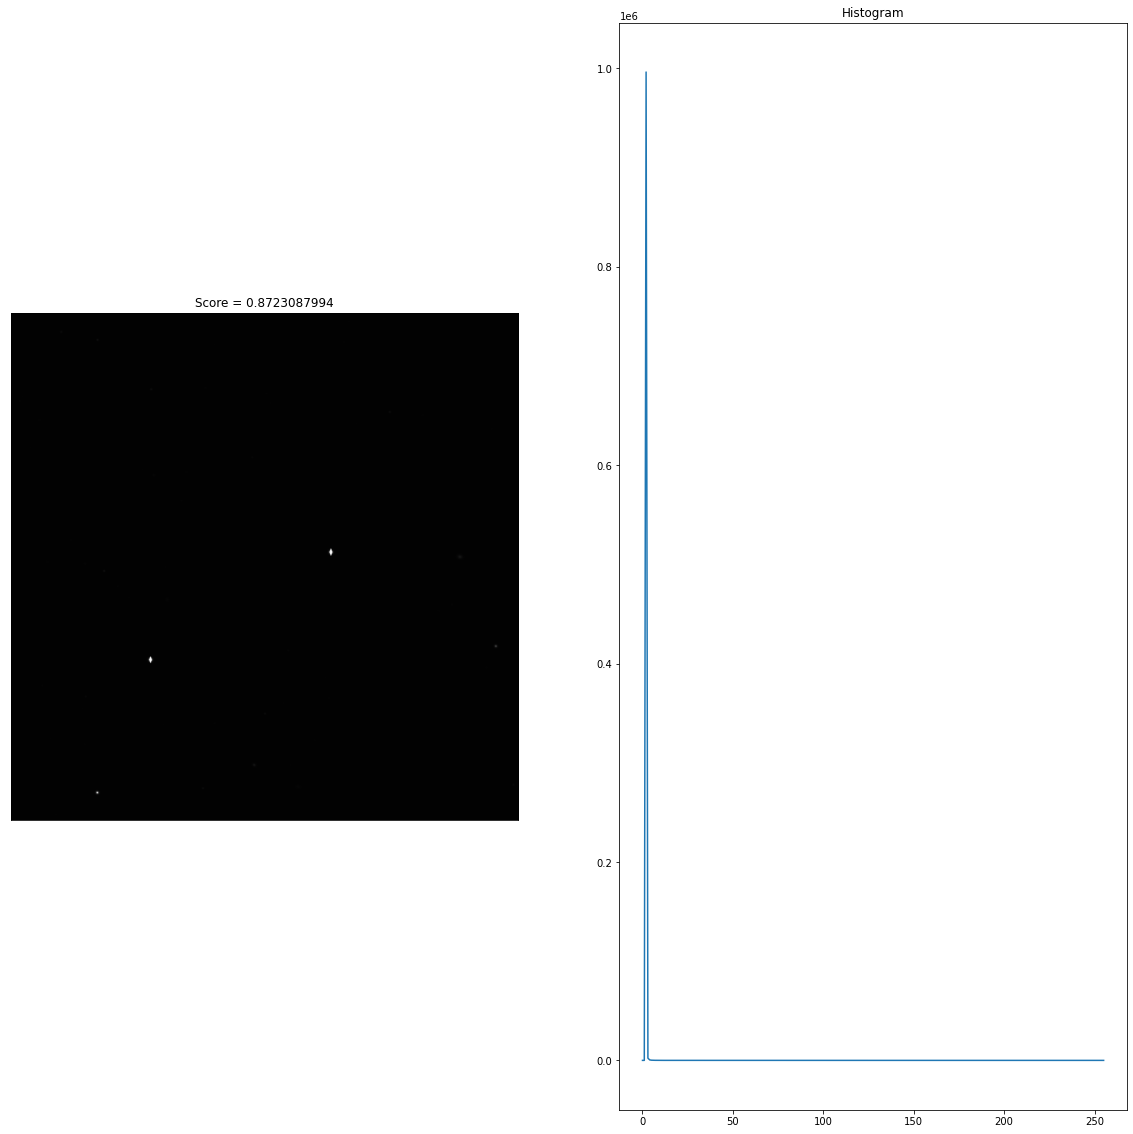

3675670


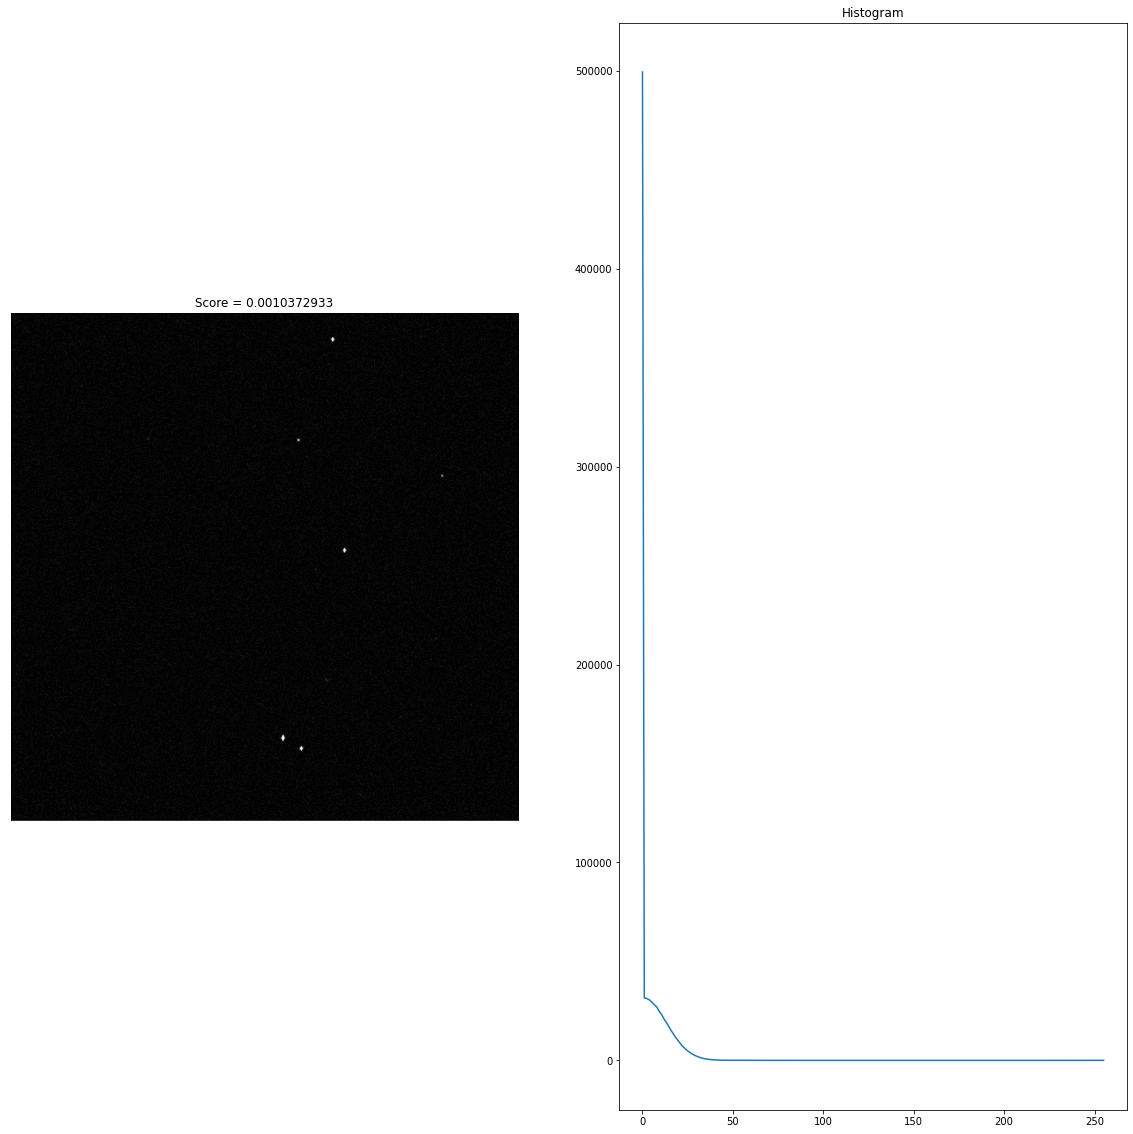

8553726


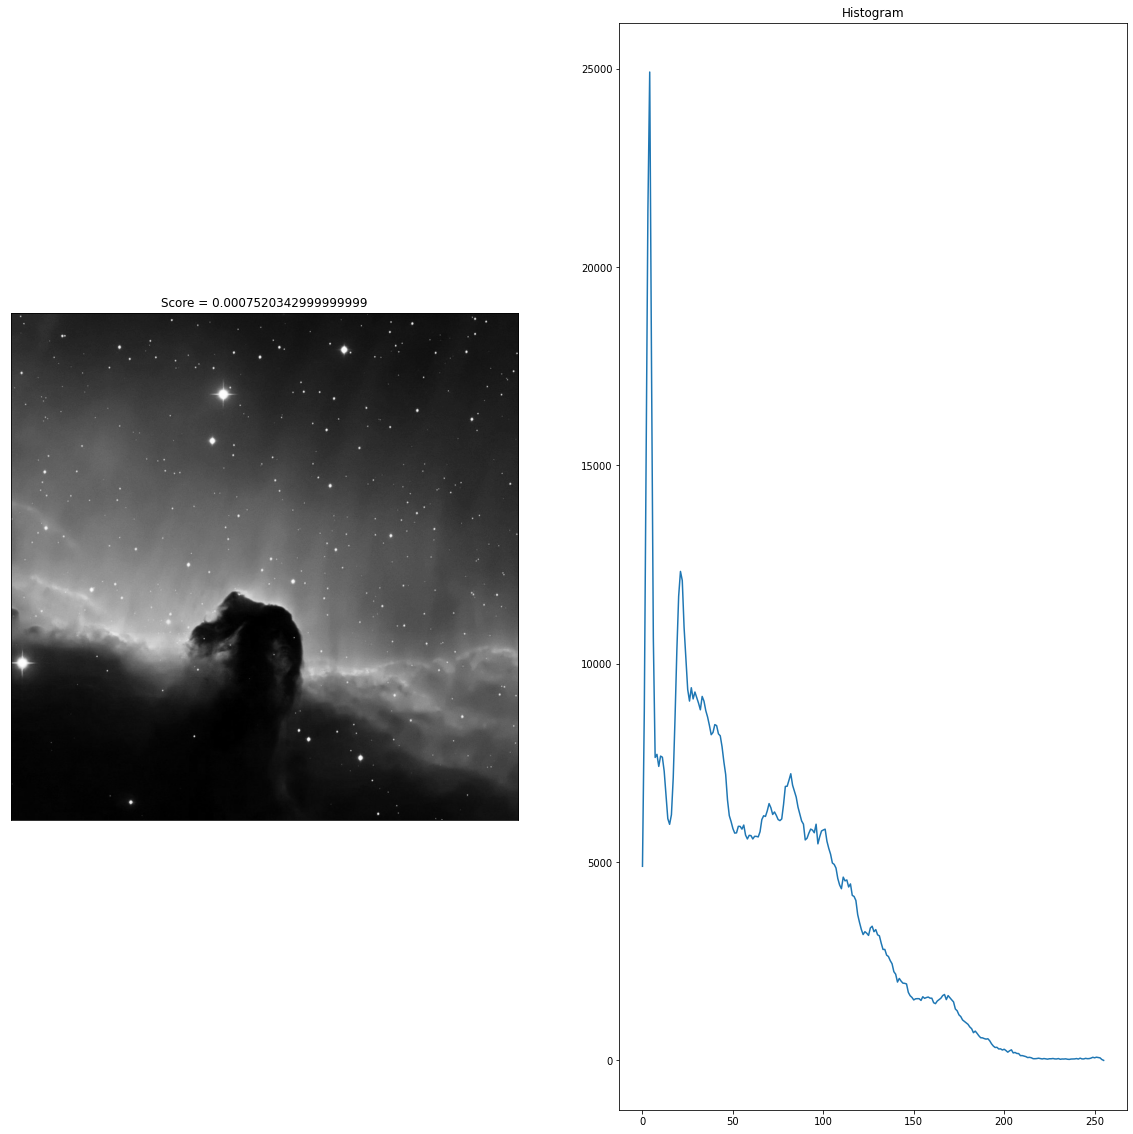

5099383


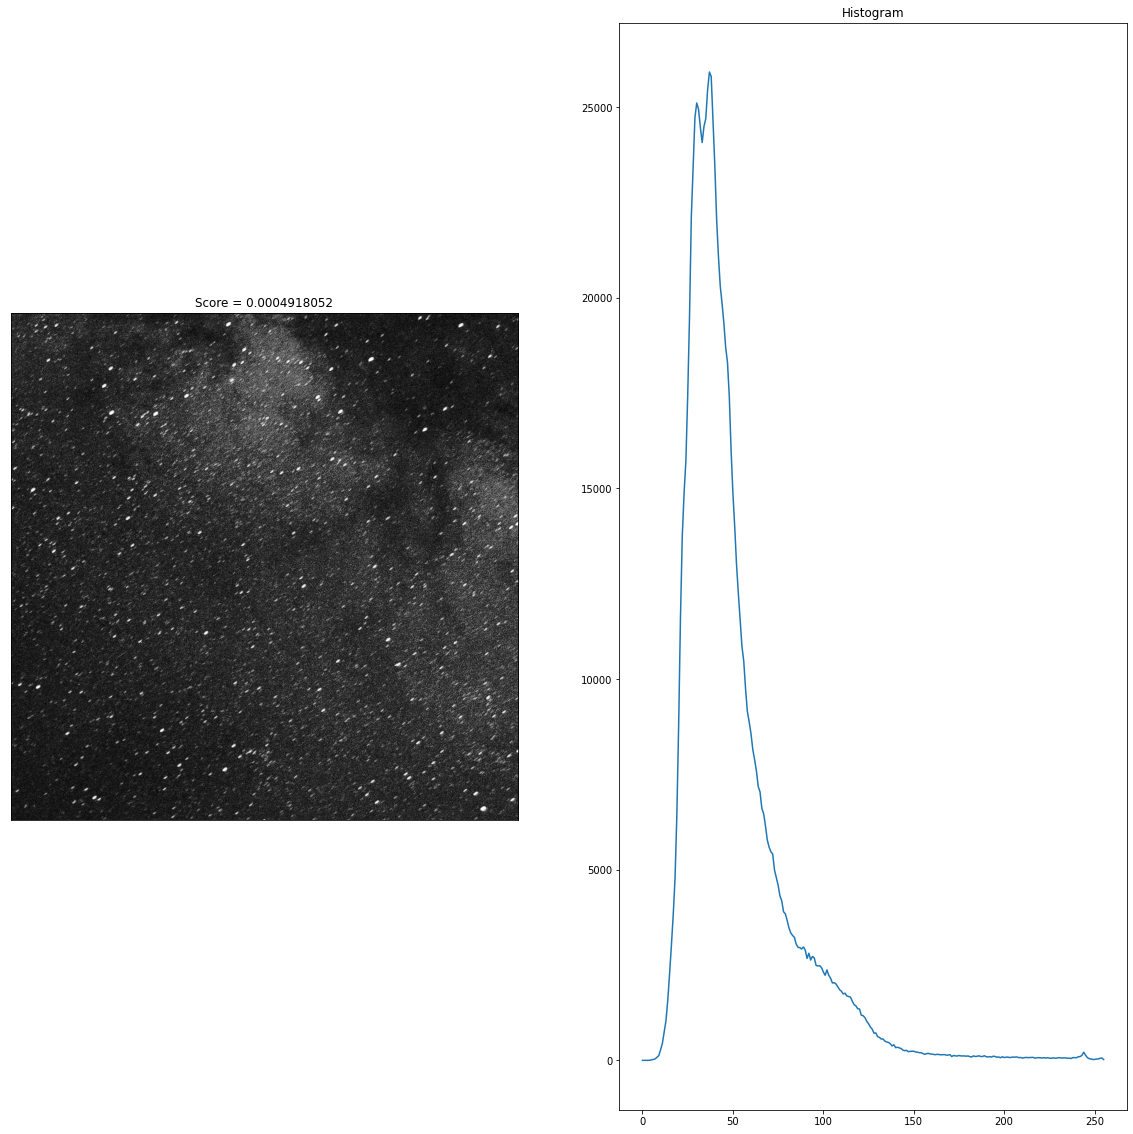

=== Score is  1
5694059


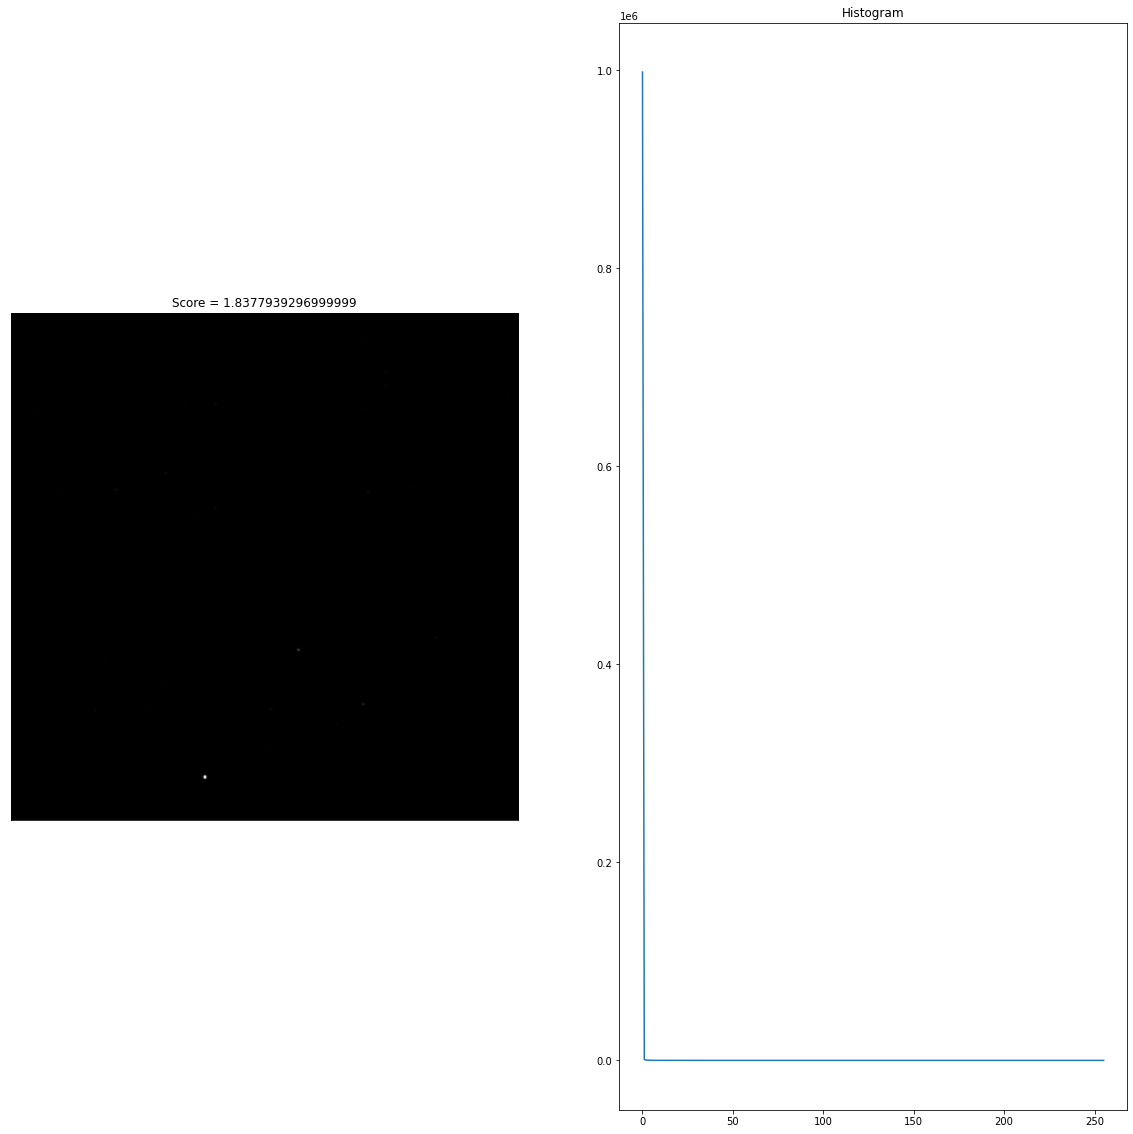

4789495


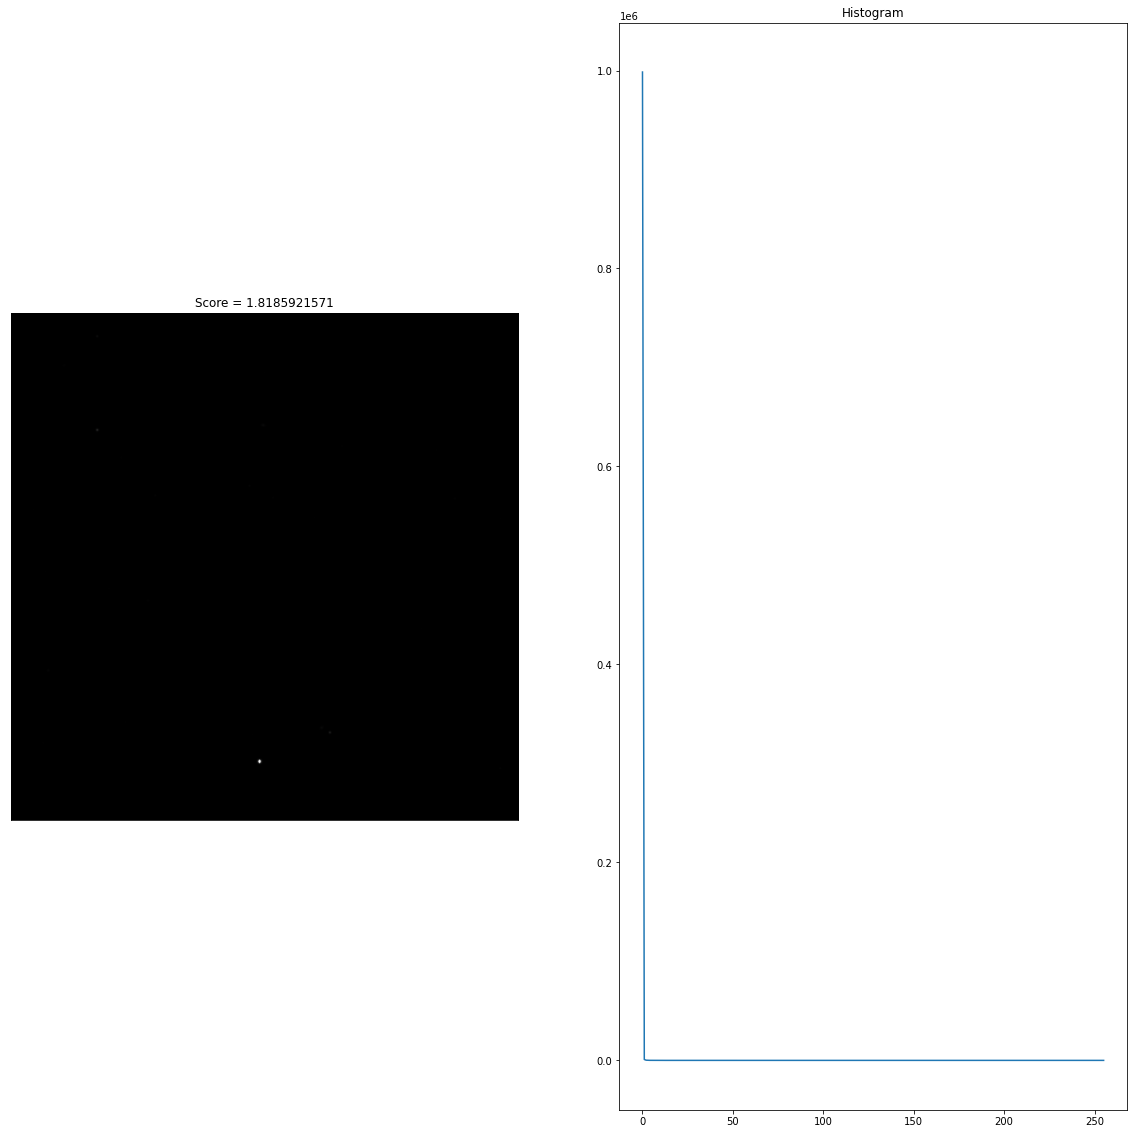

7914064


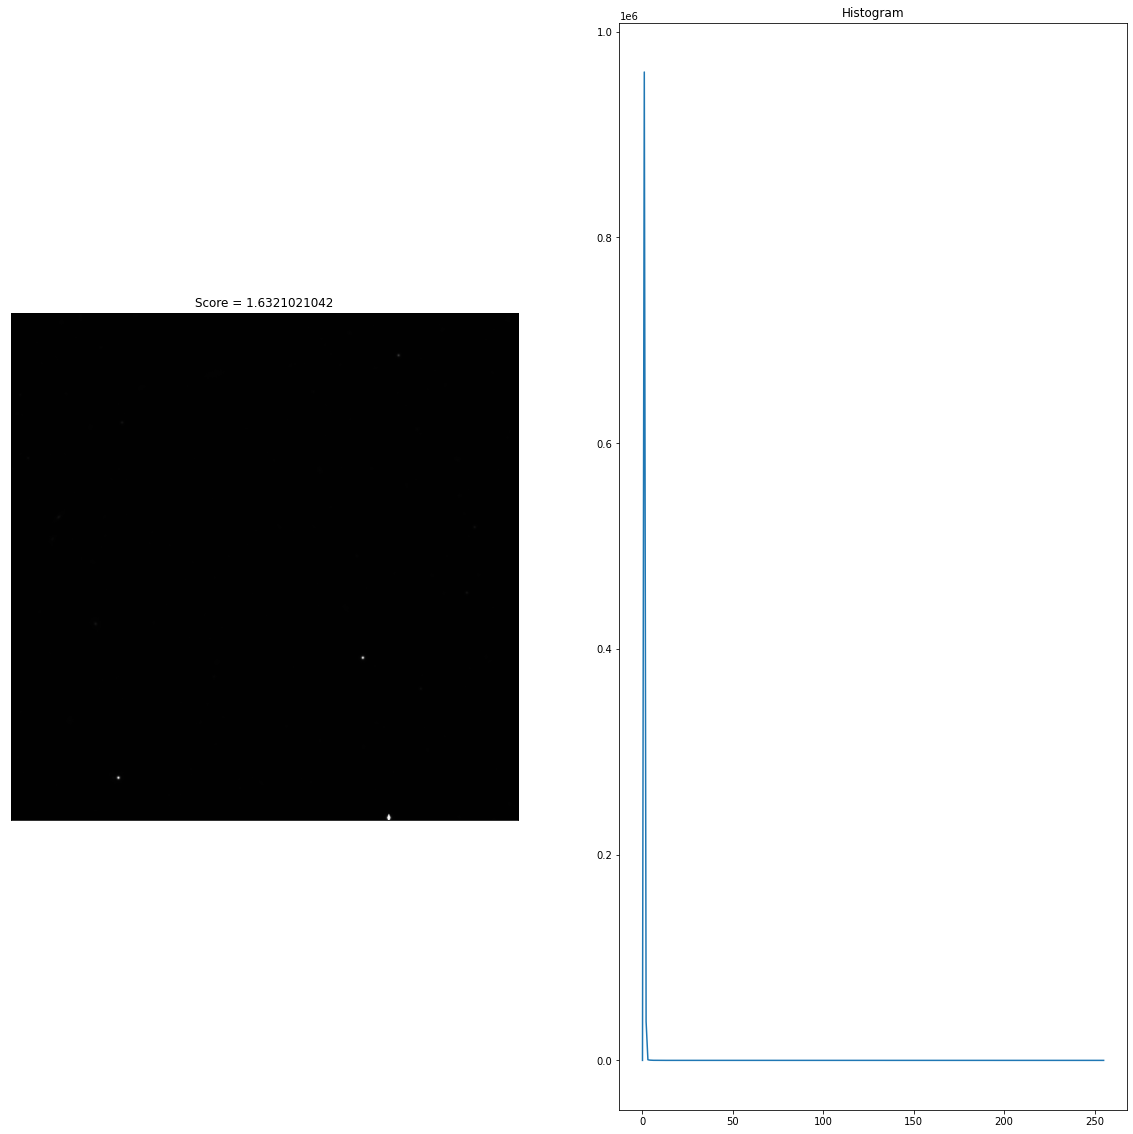

2782798


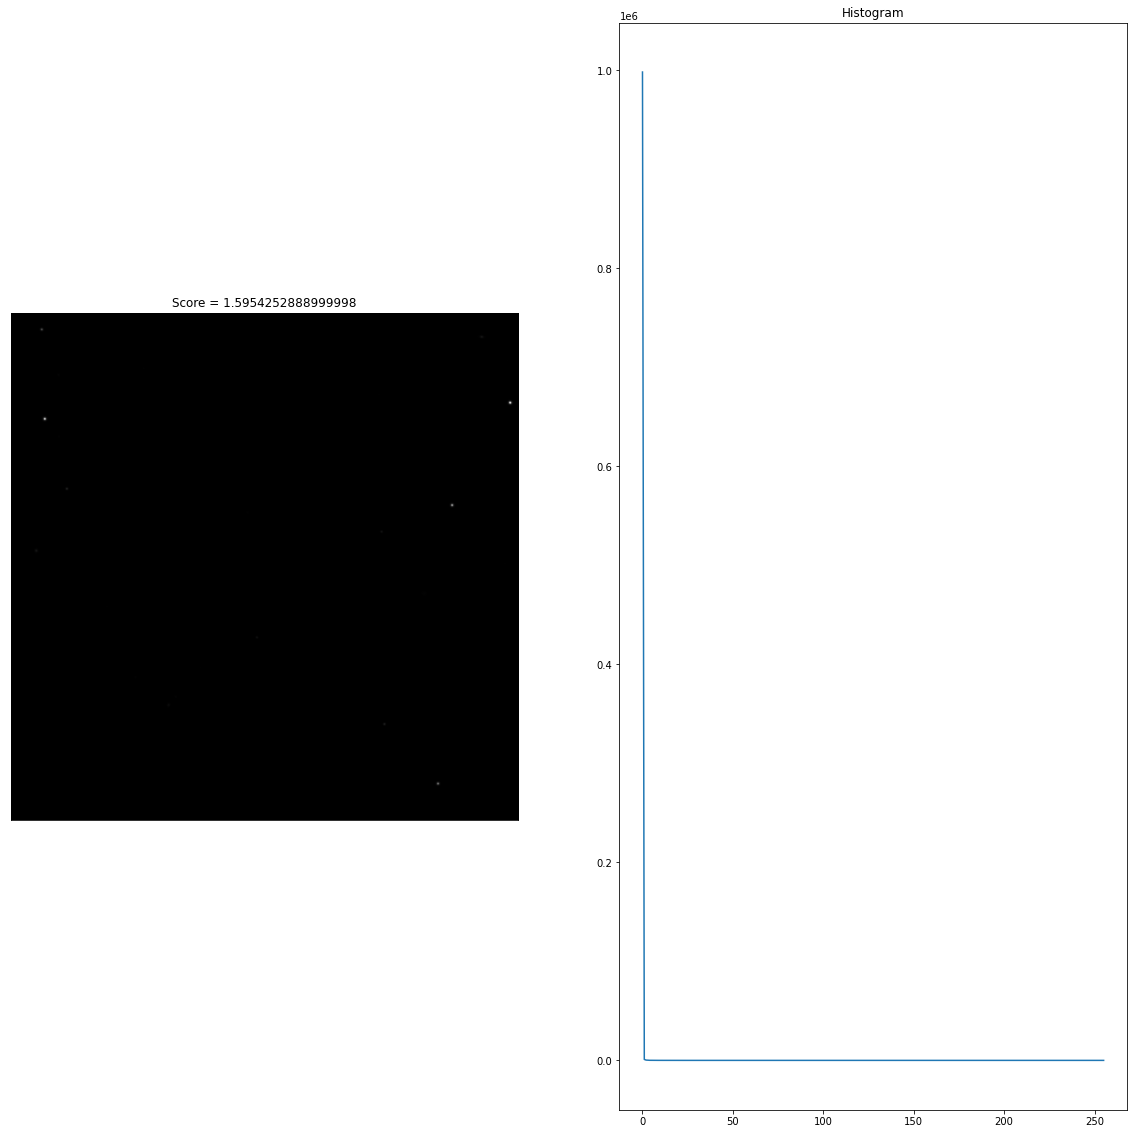

2490274


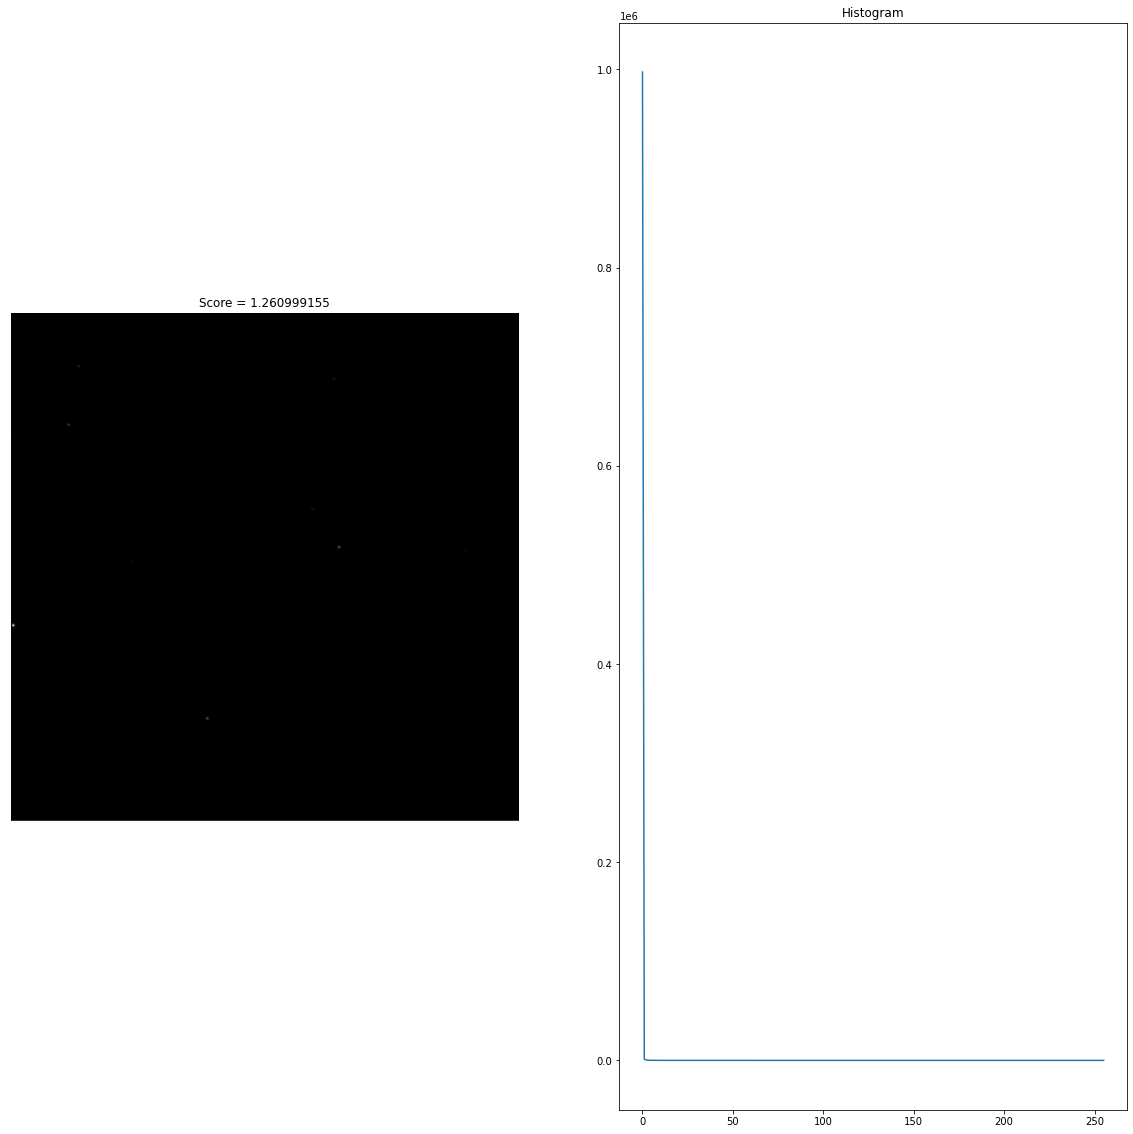

=== Score is  2
1315360


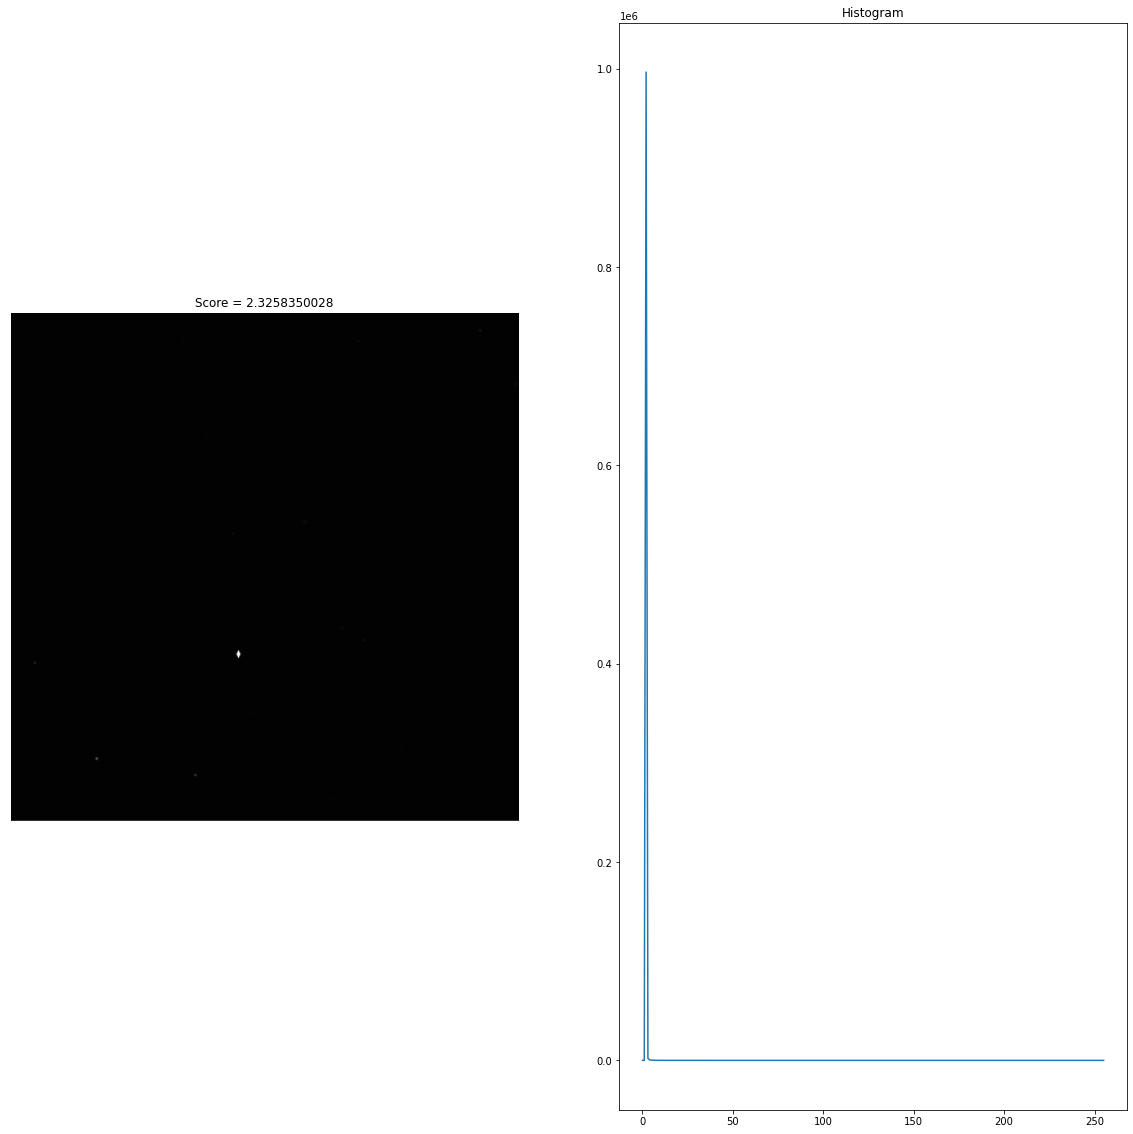

6243184


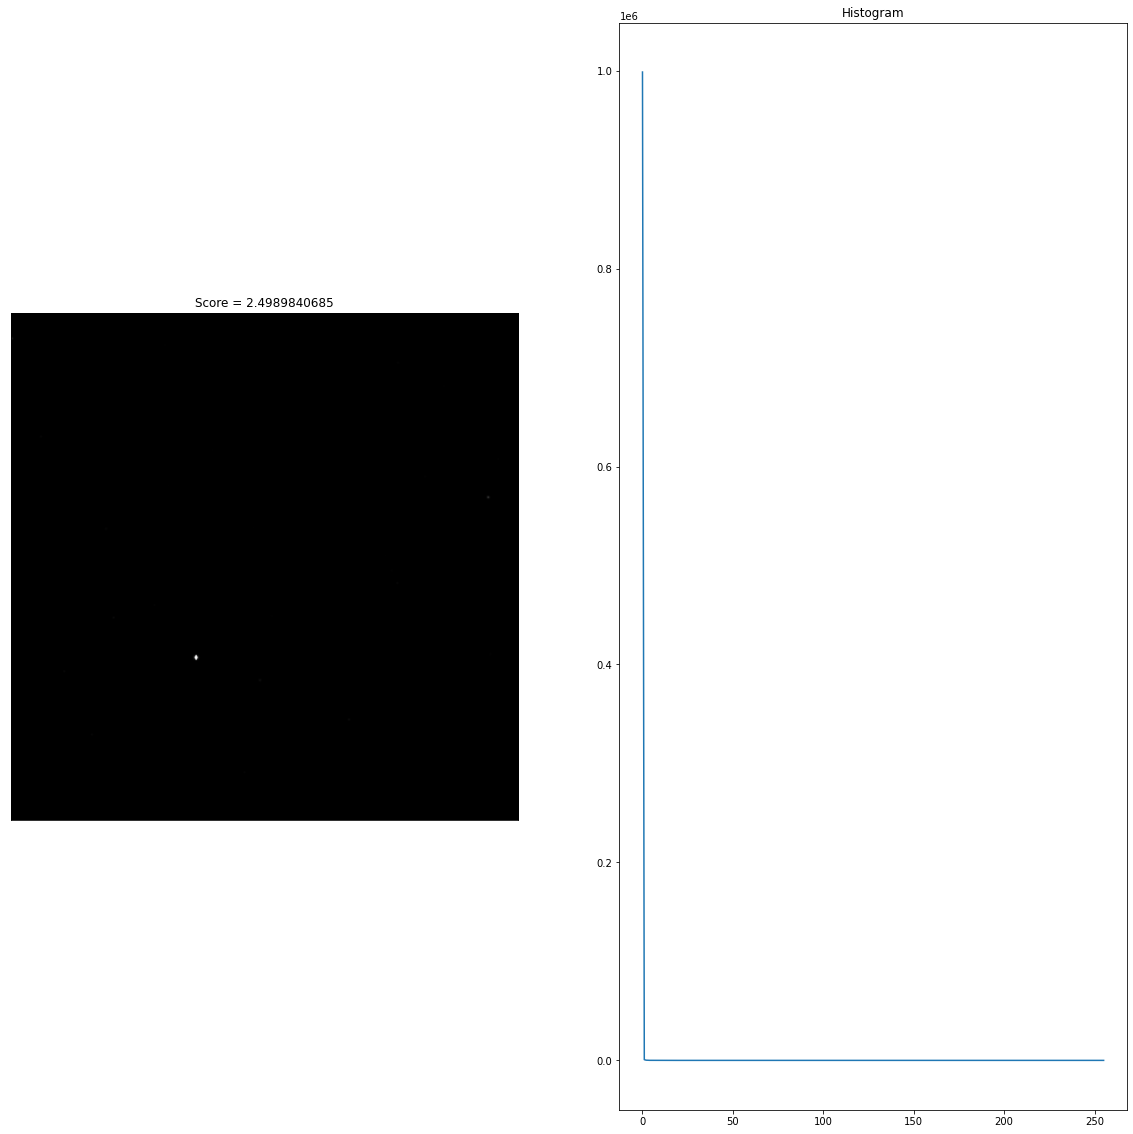

6788290


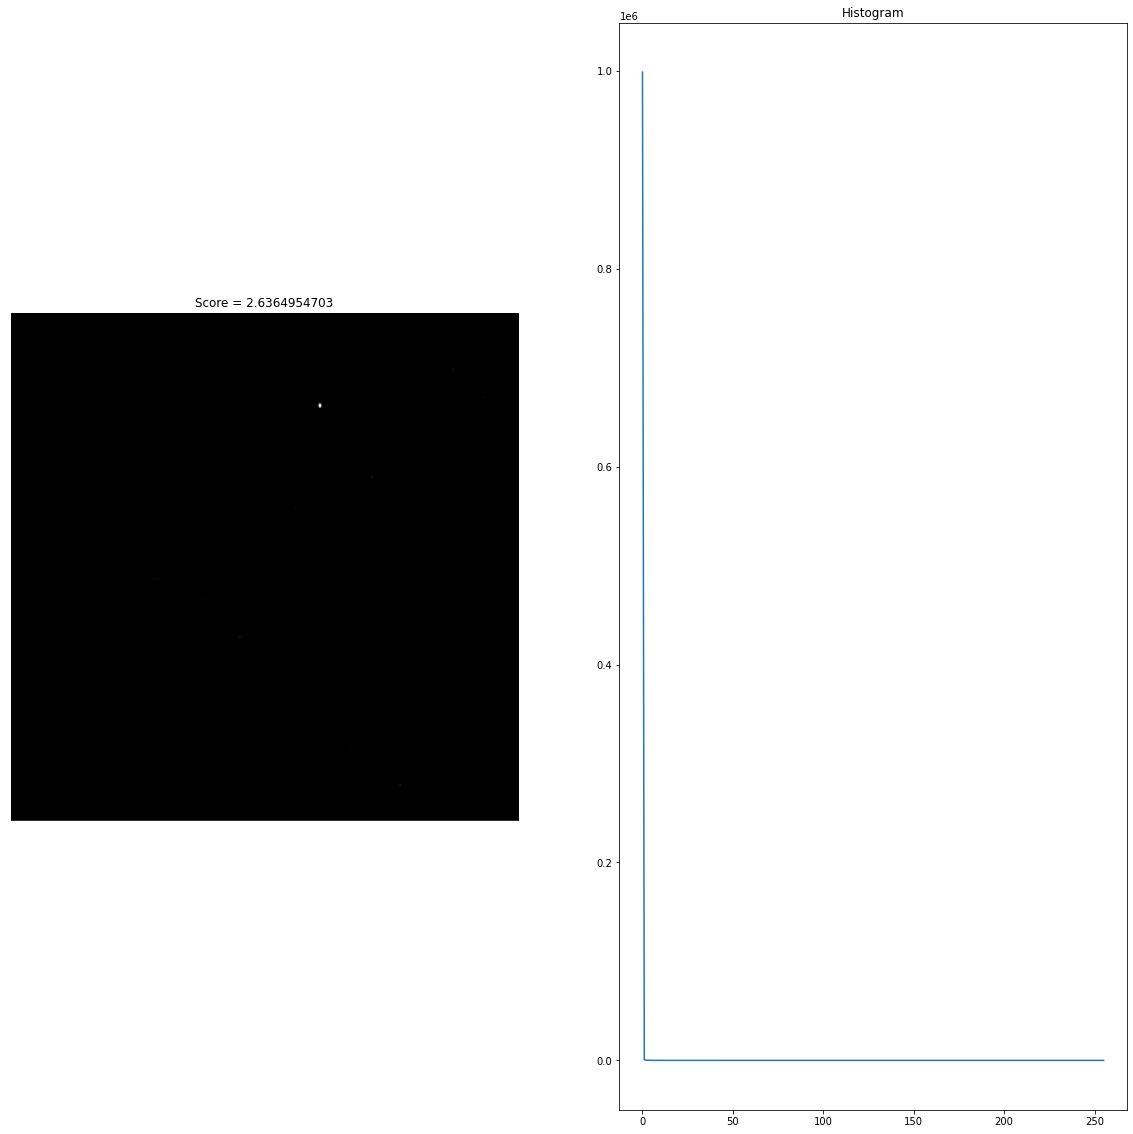

1284205


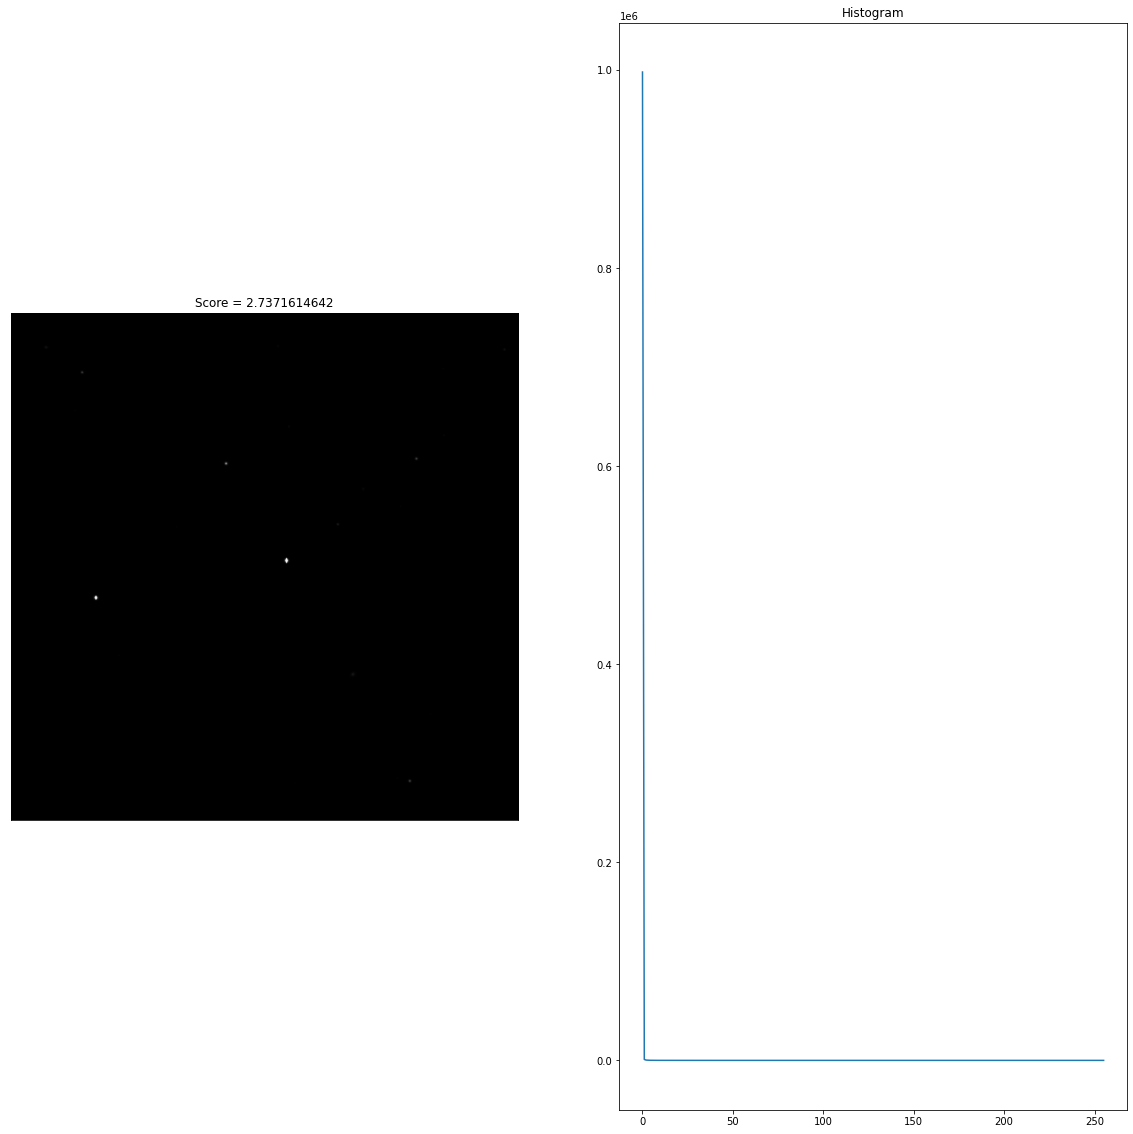

1336861


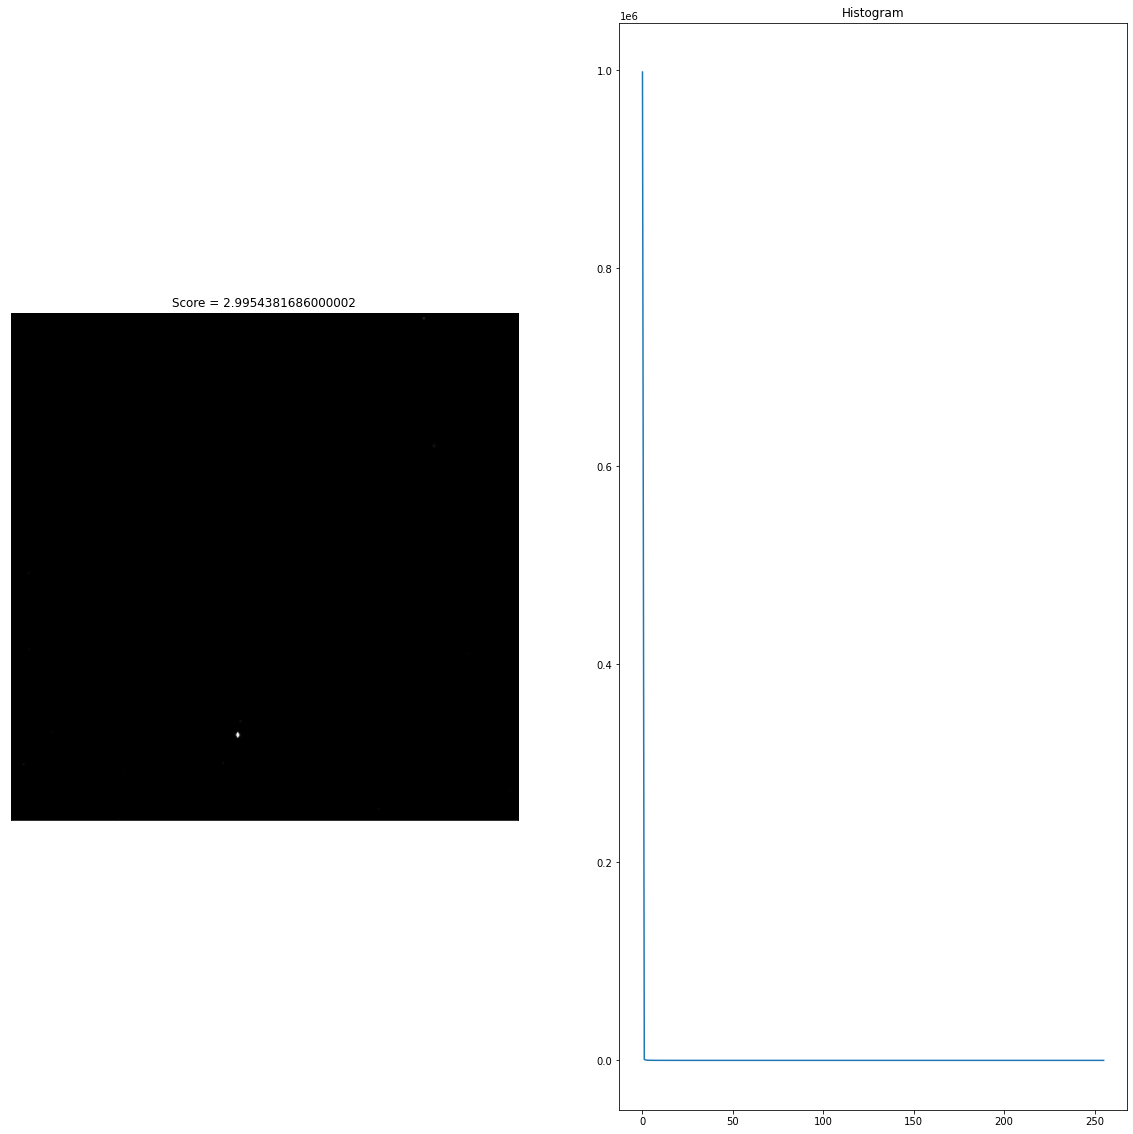

=== Score is  3
2228590


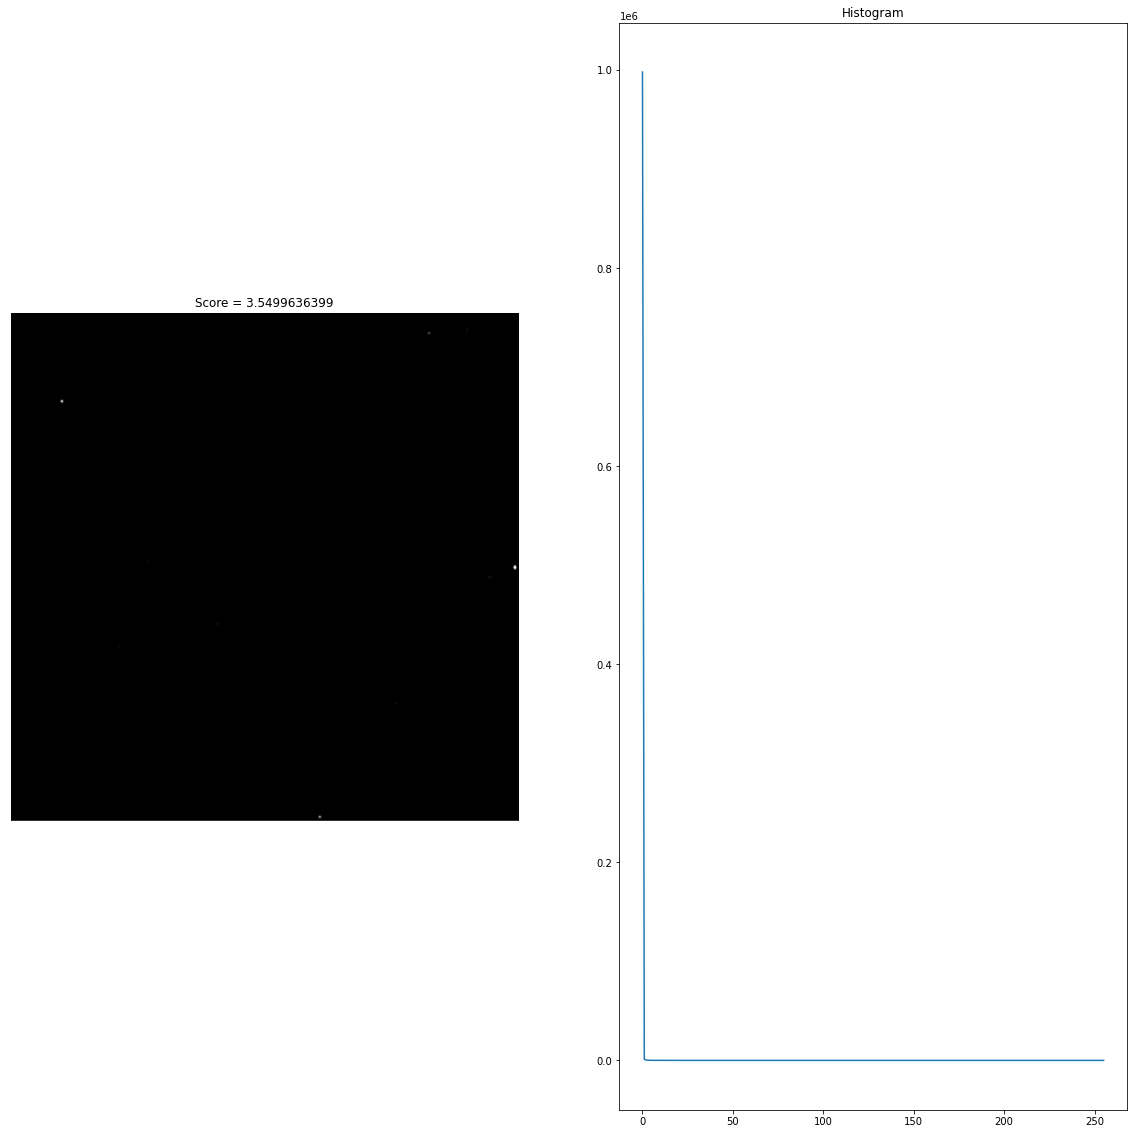

4890349


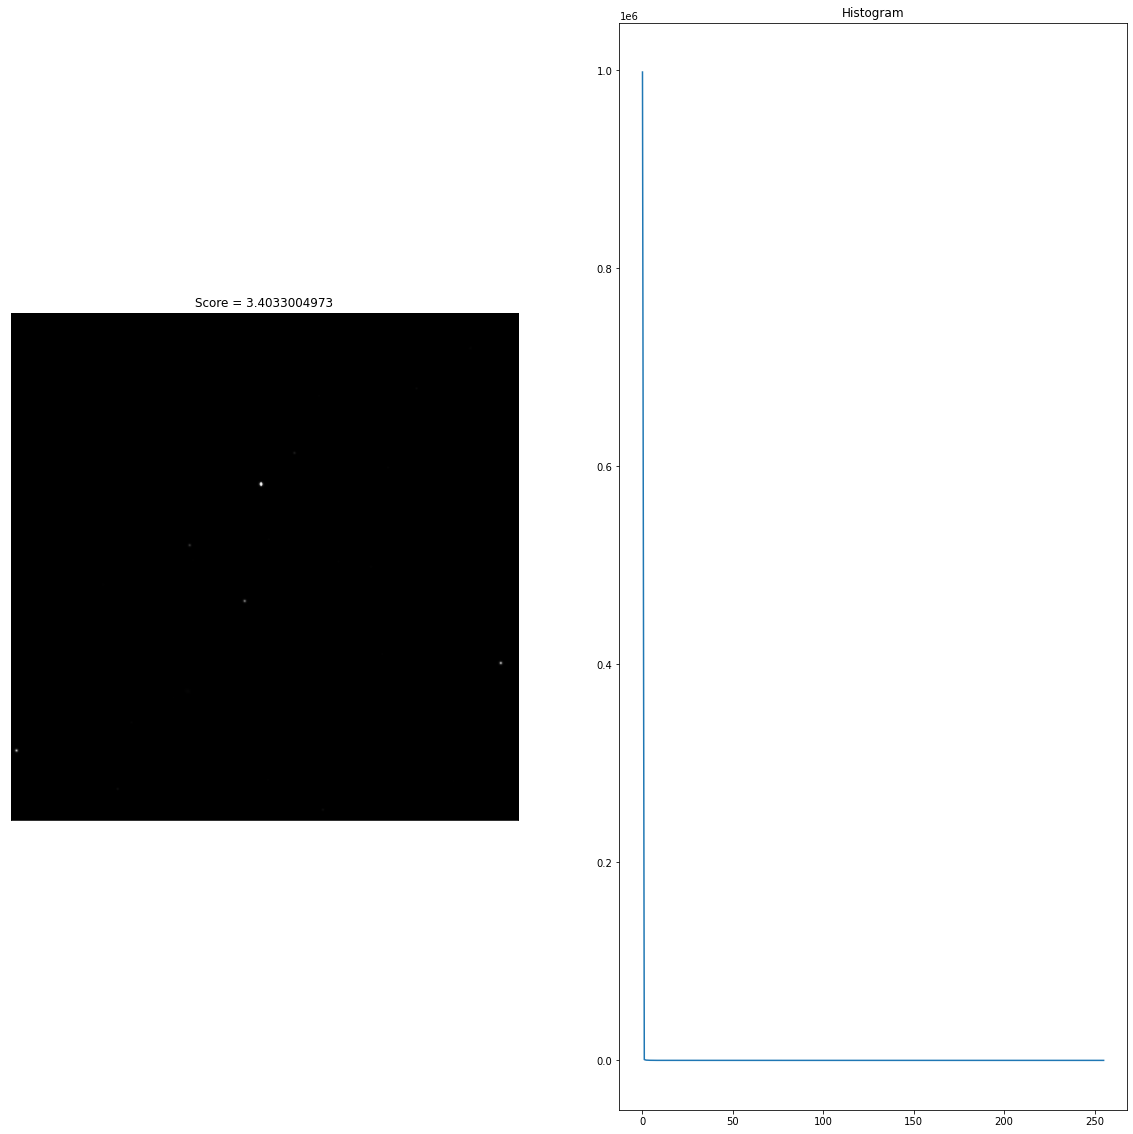

8759126


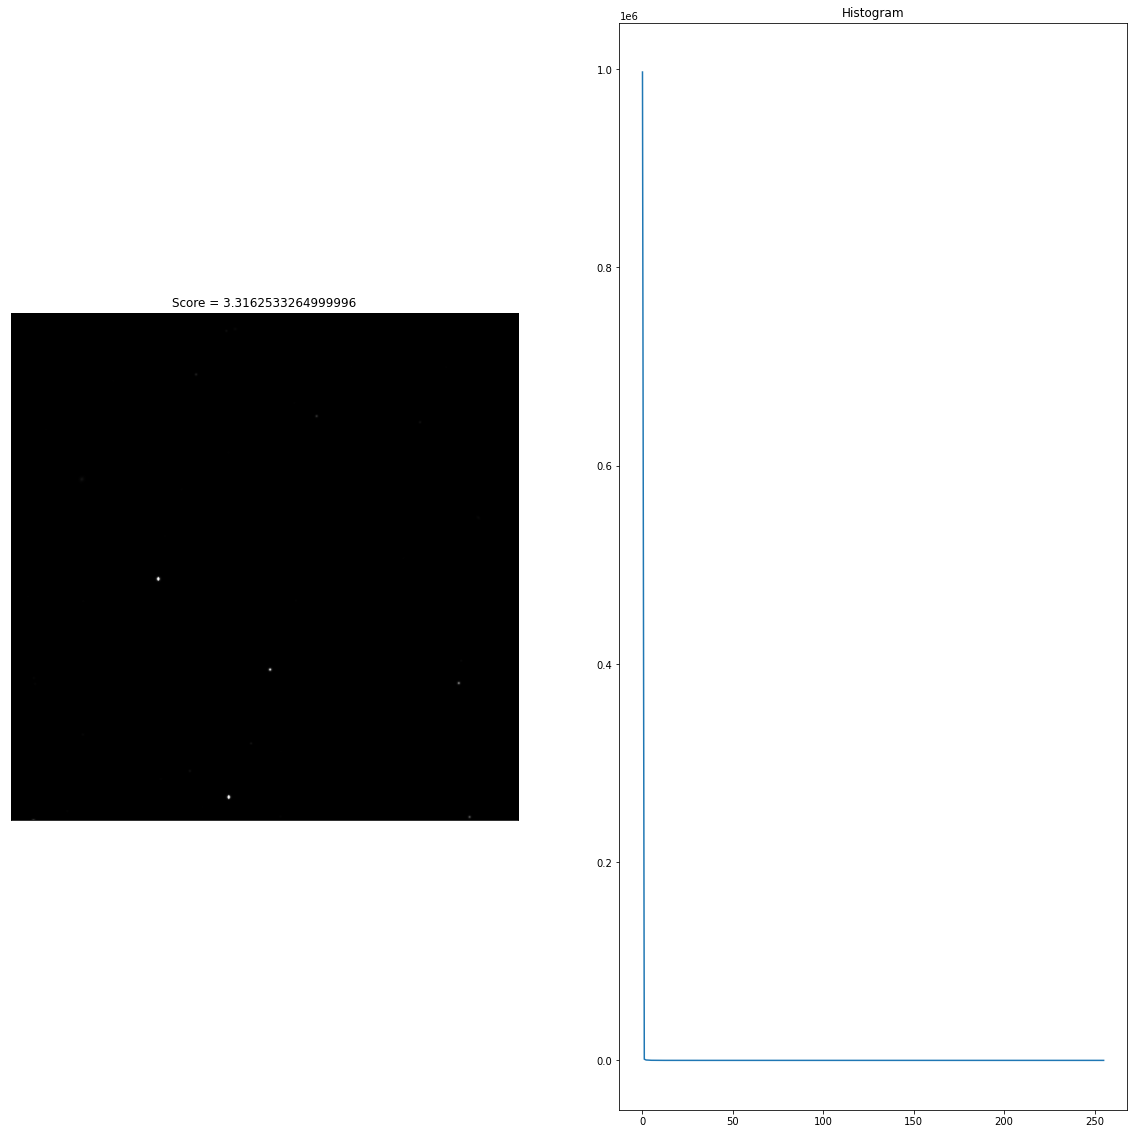

8381017


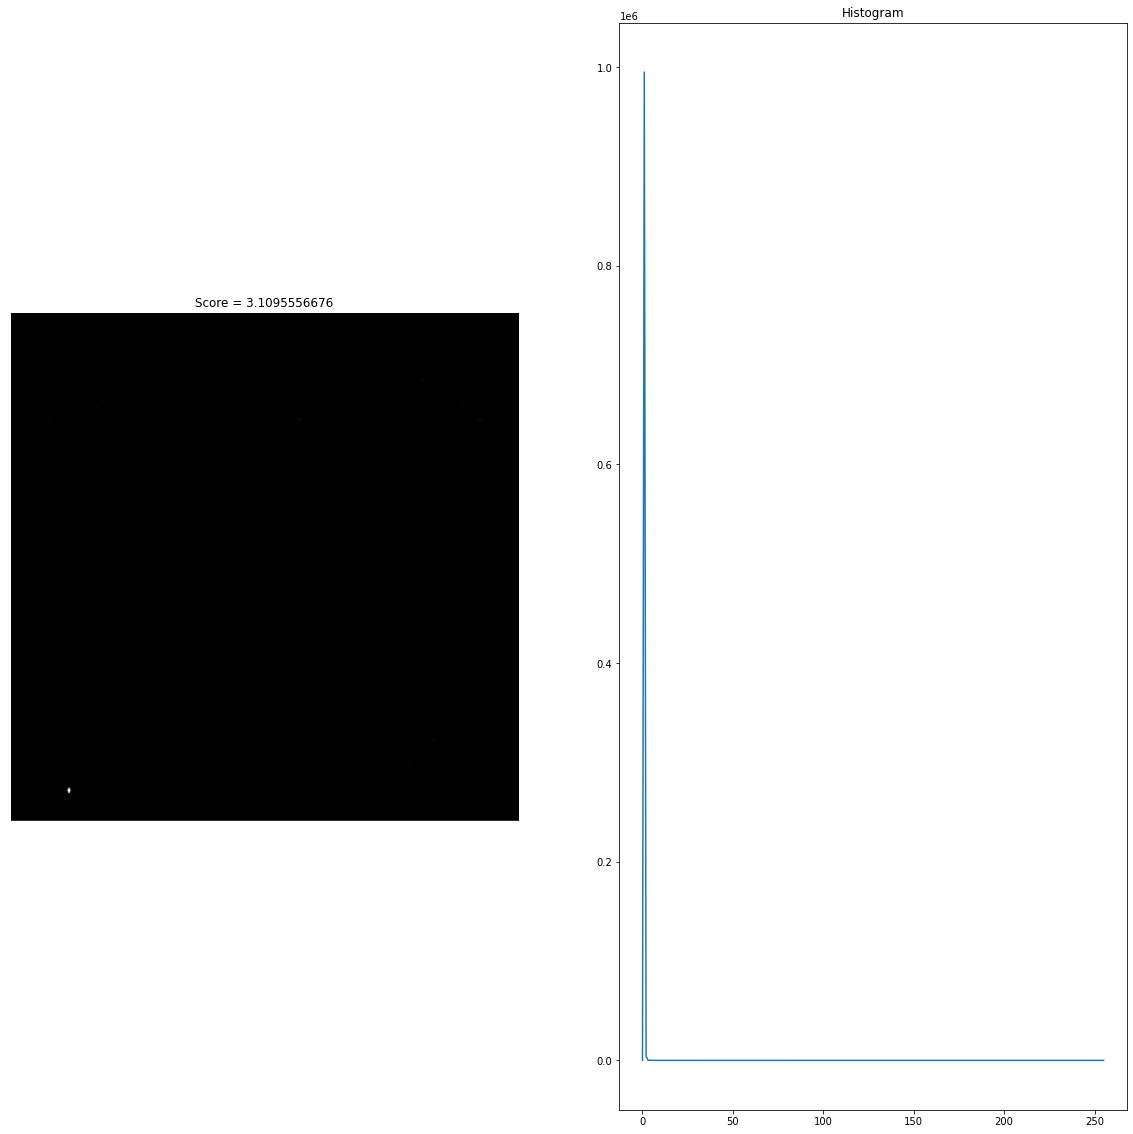

2612198


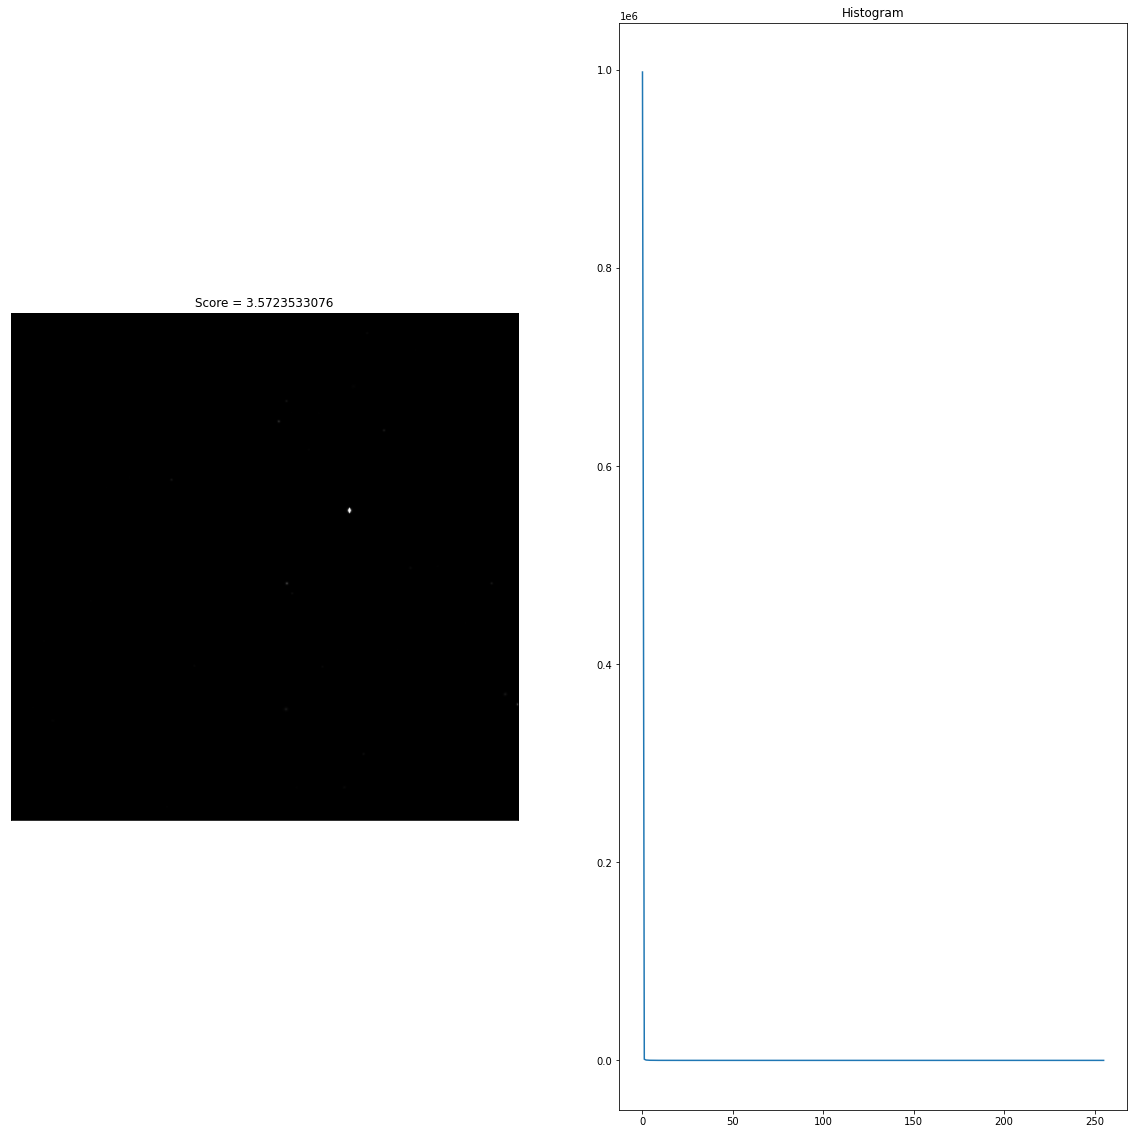

=== Score is  4
8058479


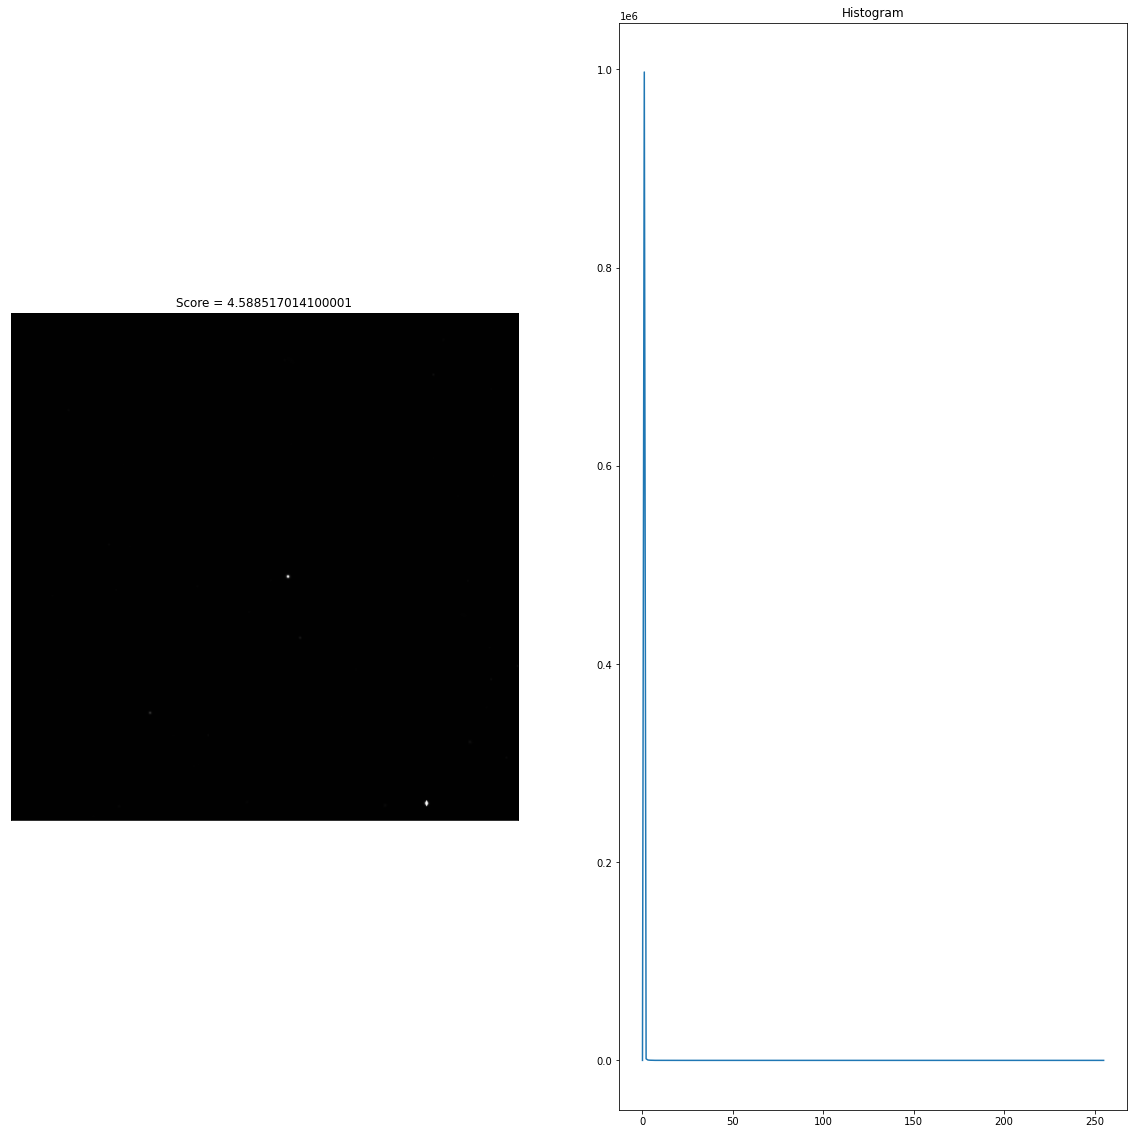

6551701


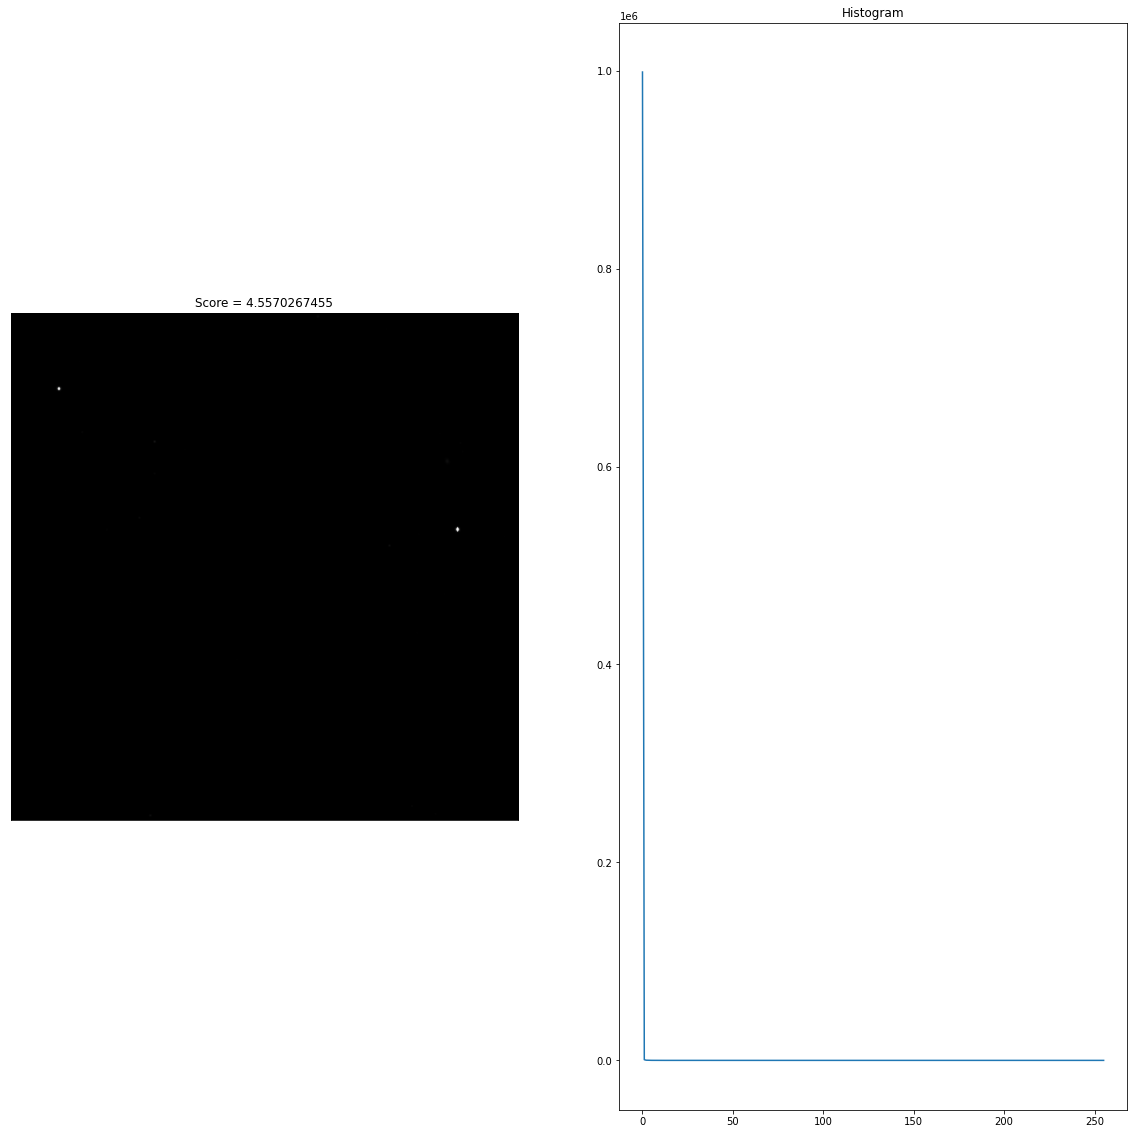

2299575


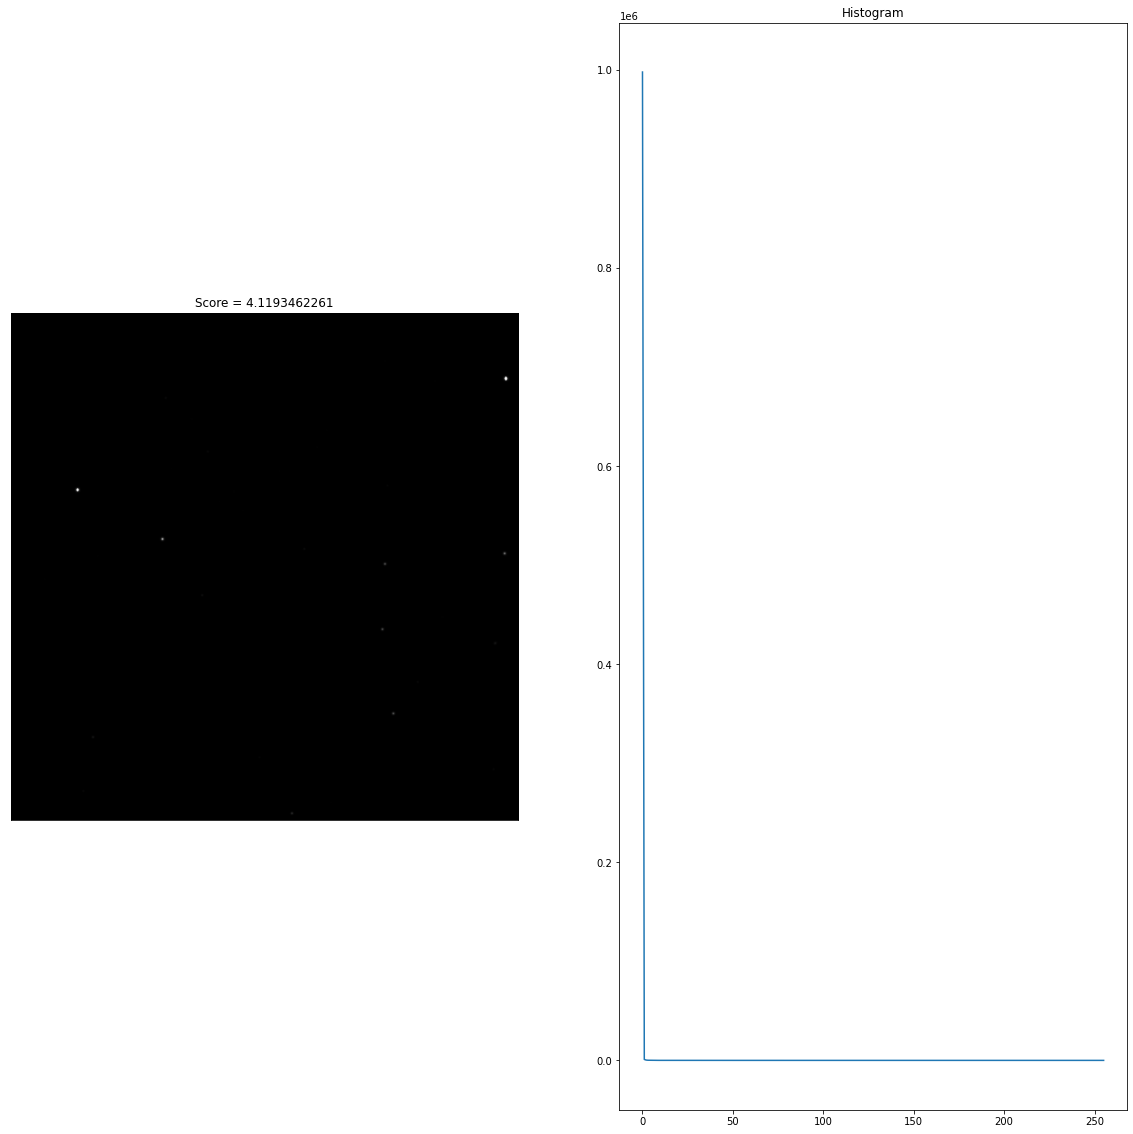

3536583


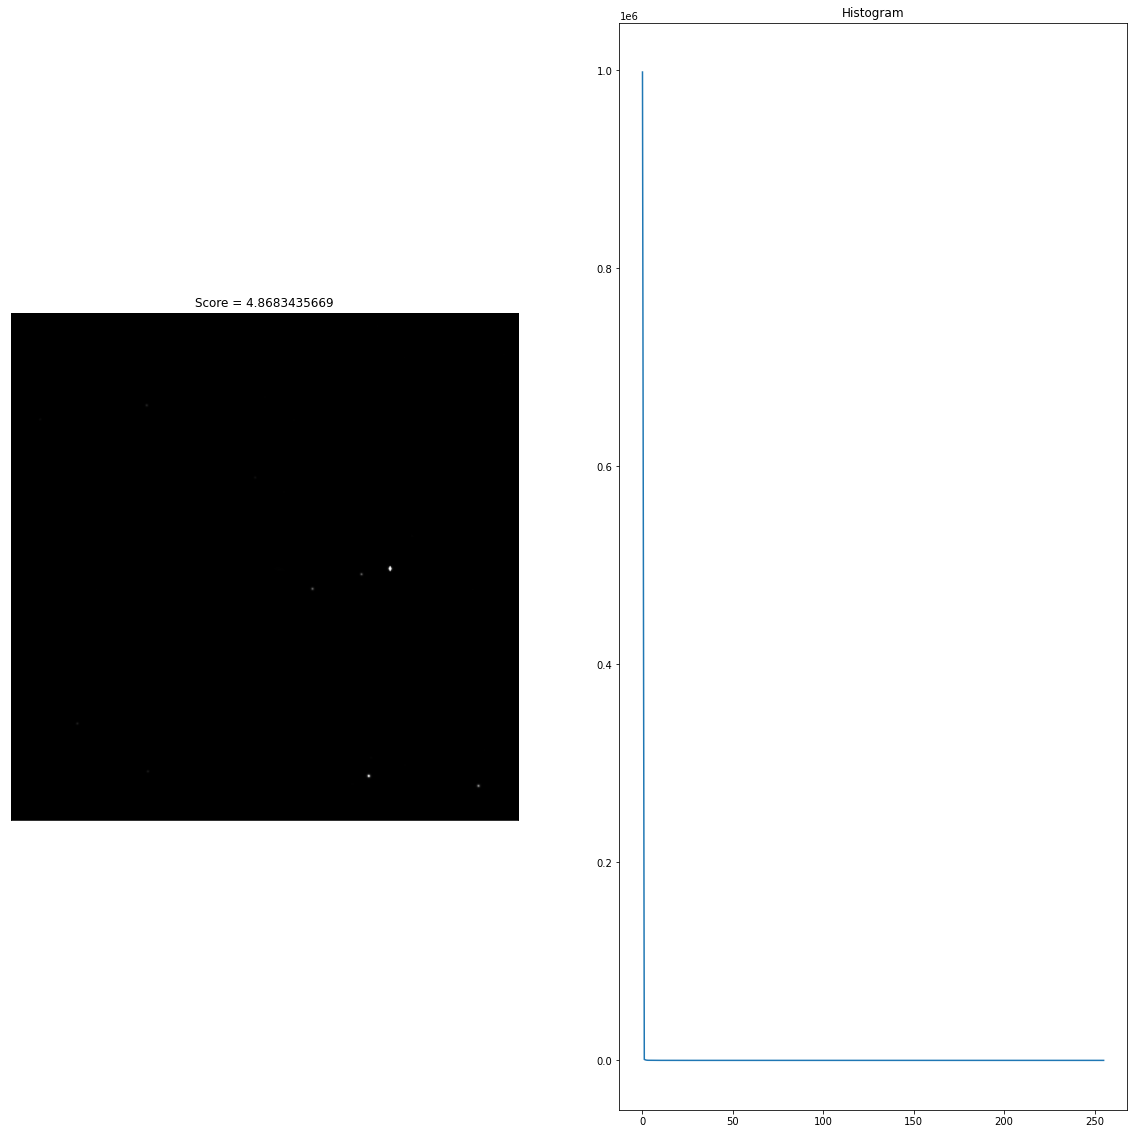

6637935


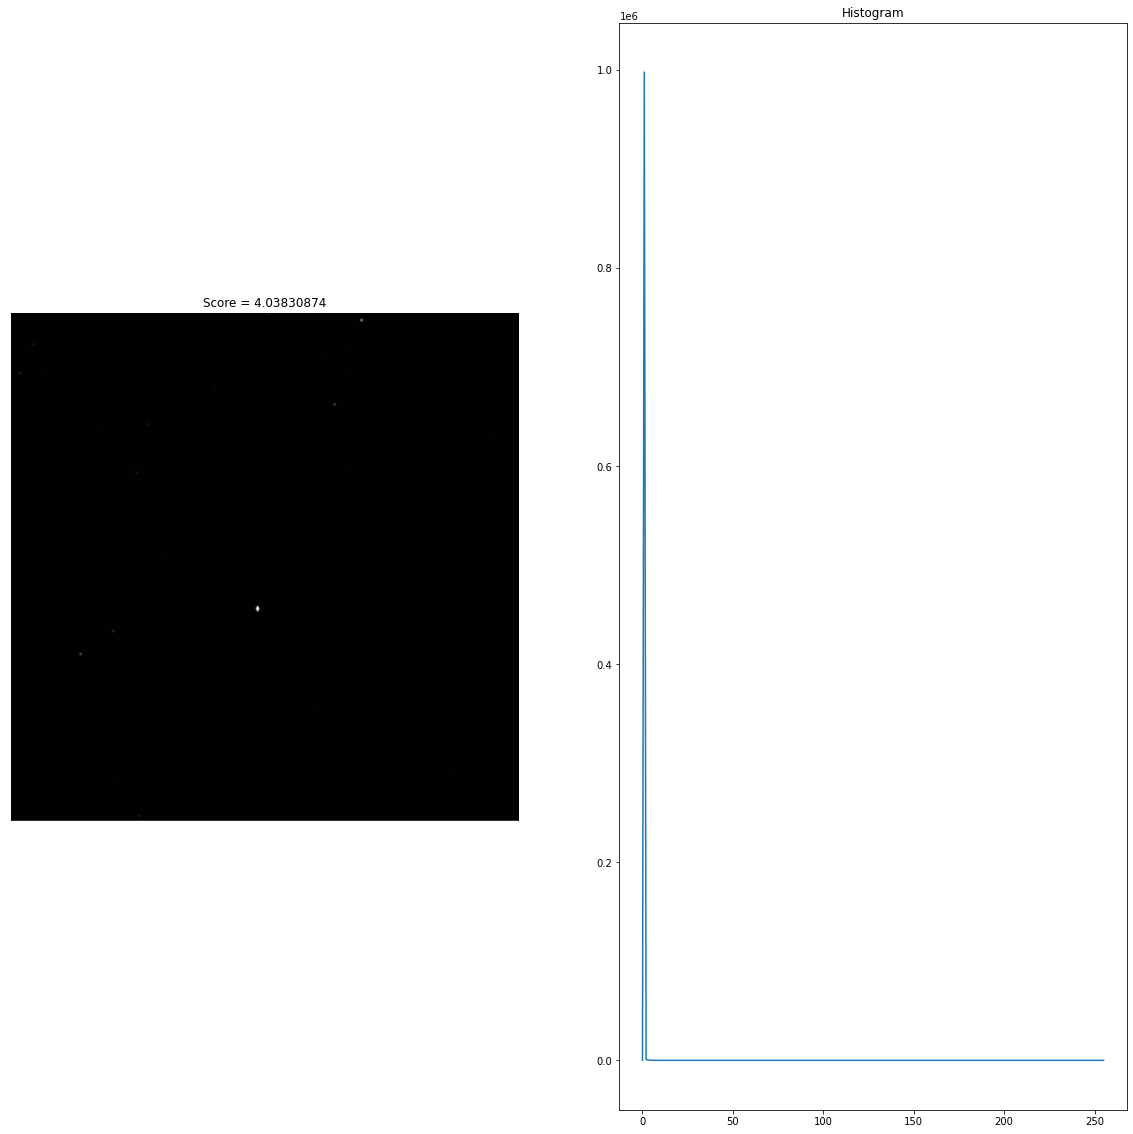

=== Score is  5
5074461


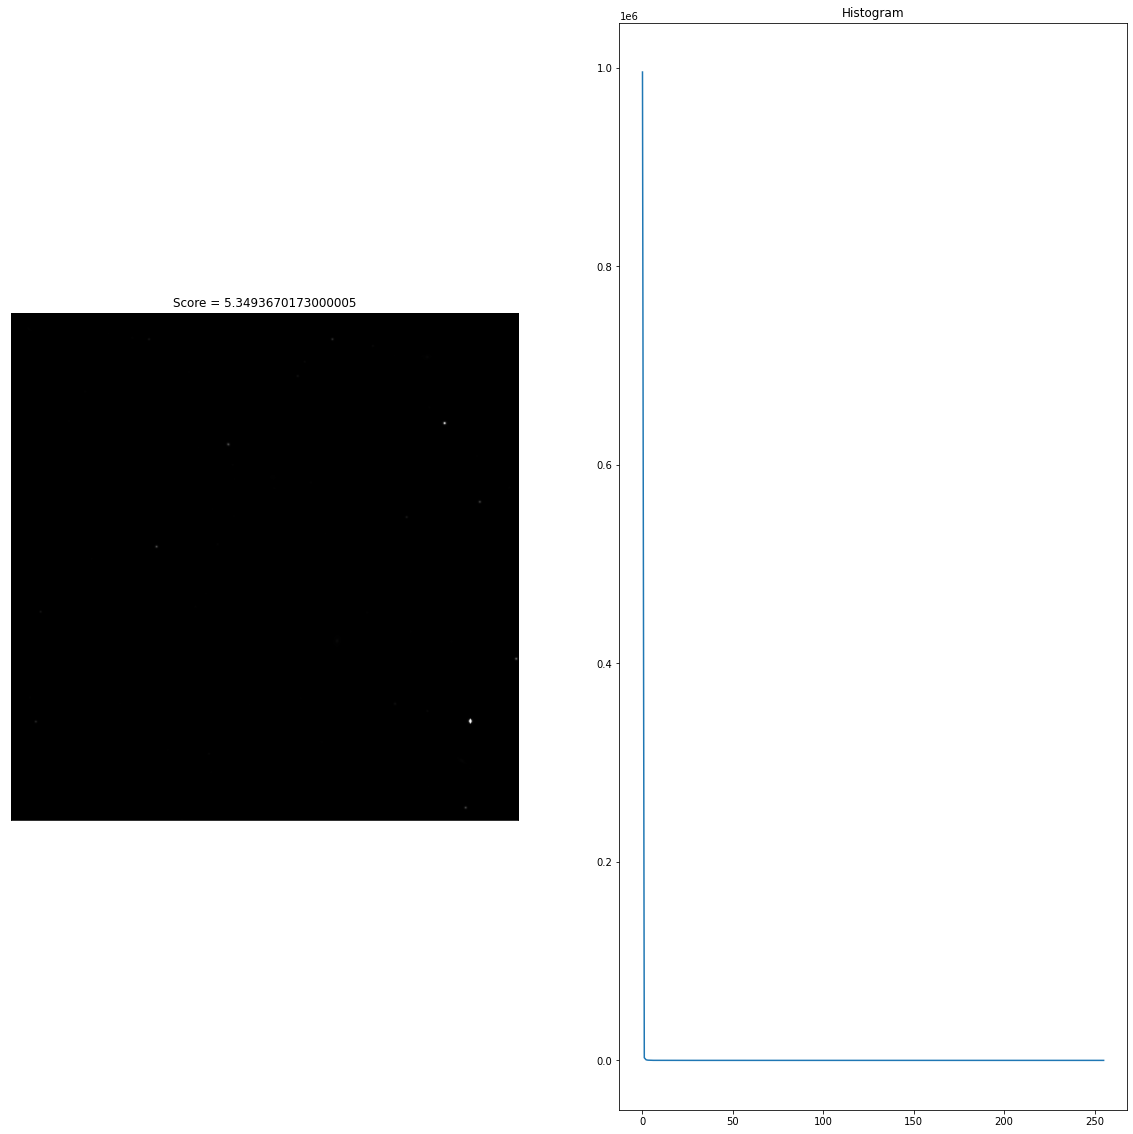

7281650


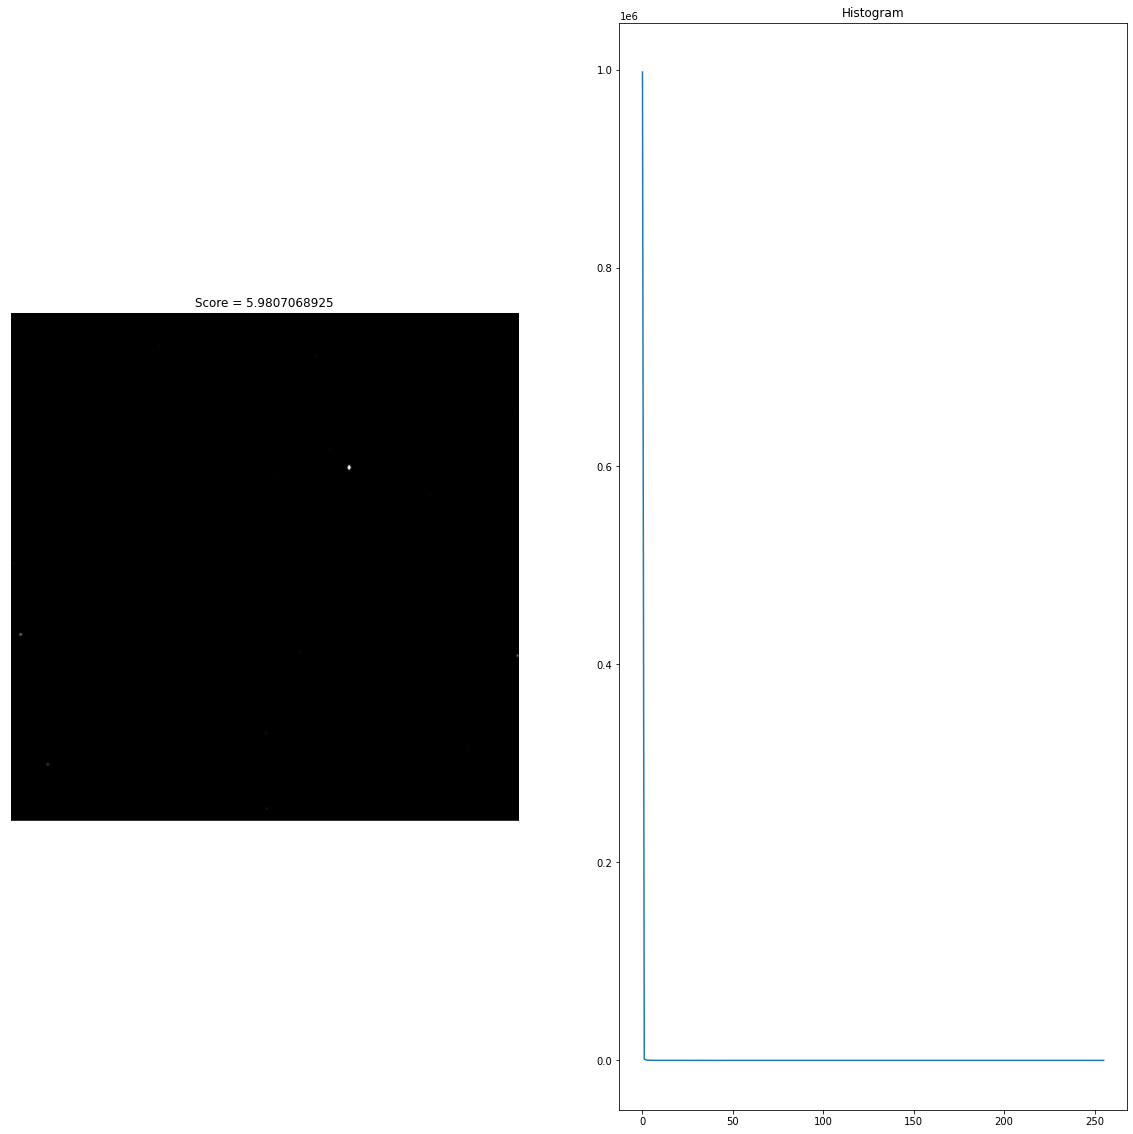

3936220


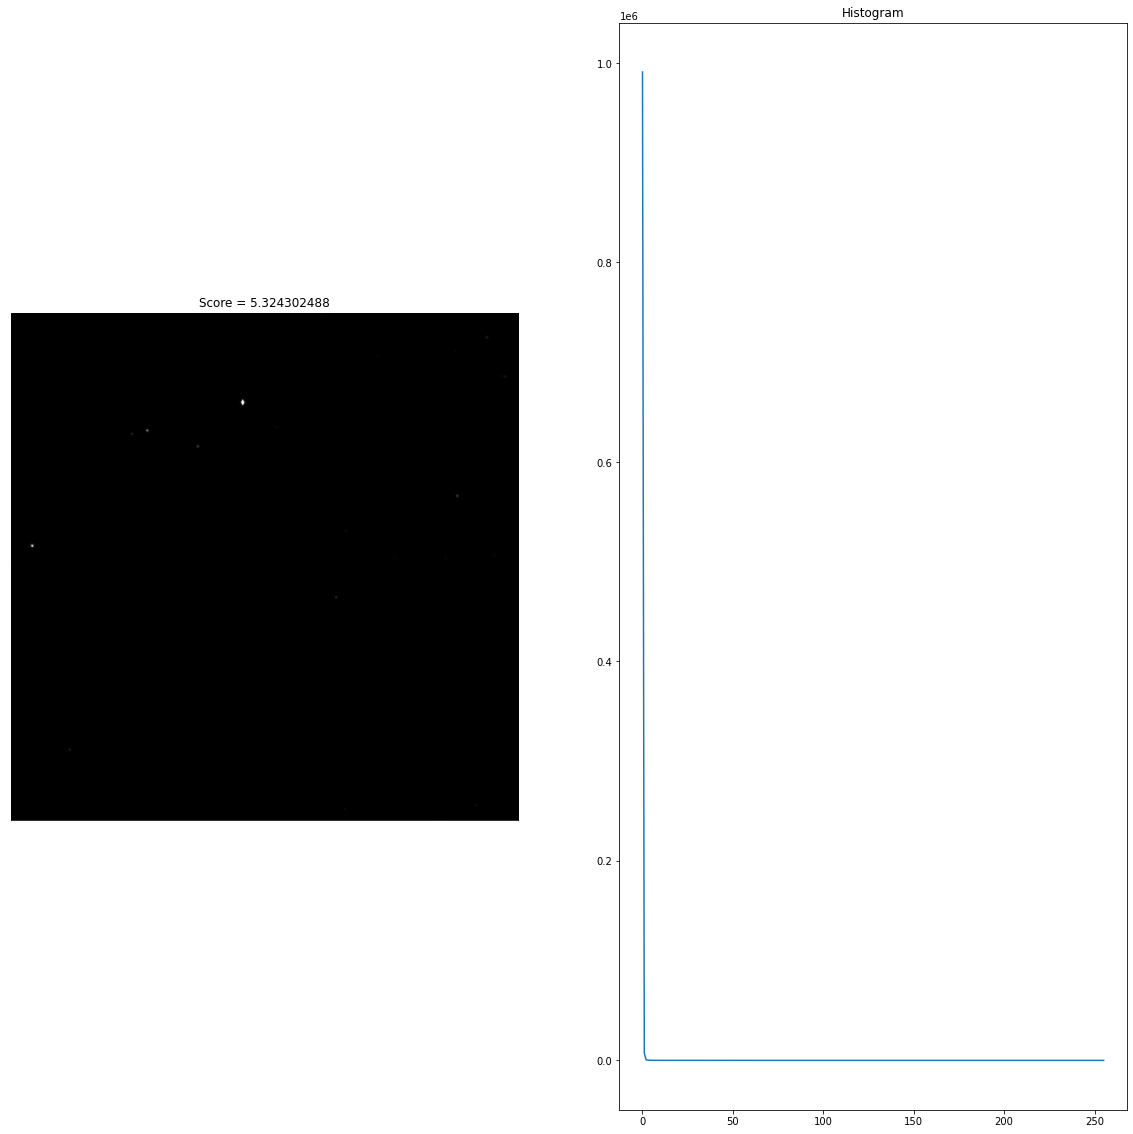

9001902


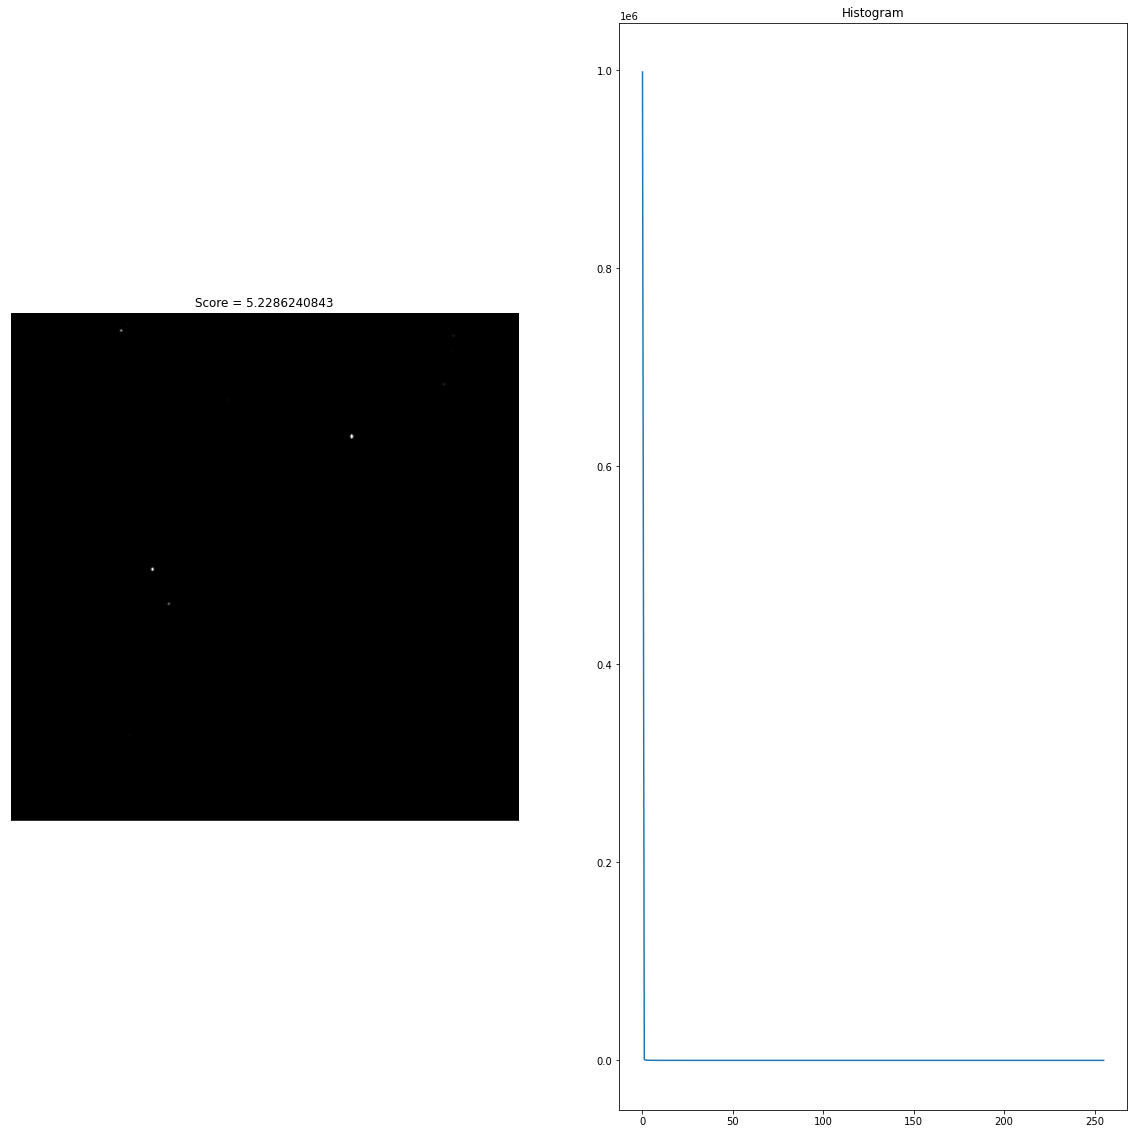

1860880


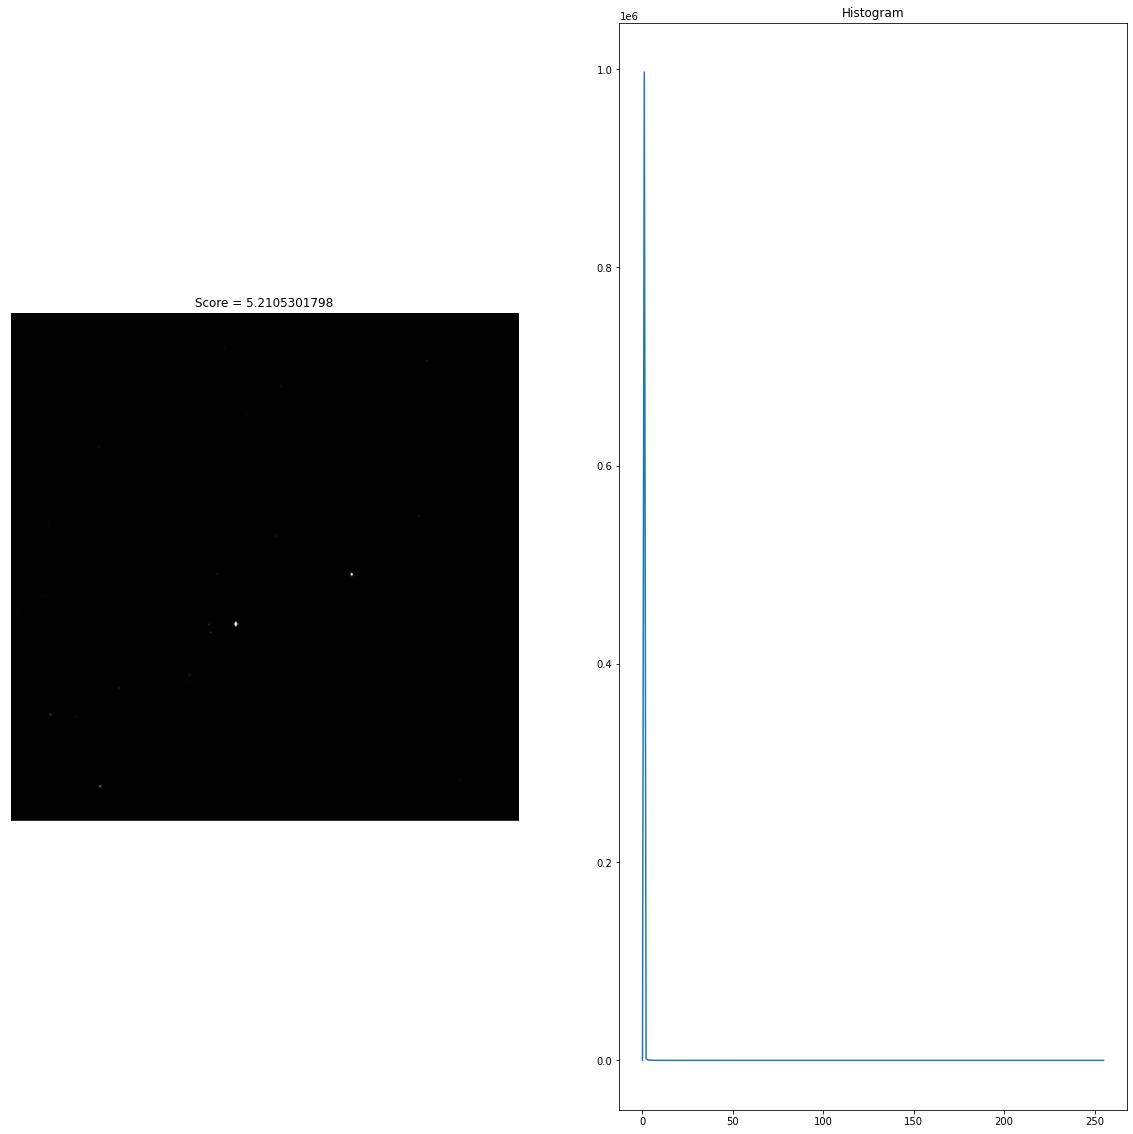

=== Score is  6
9383458


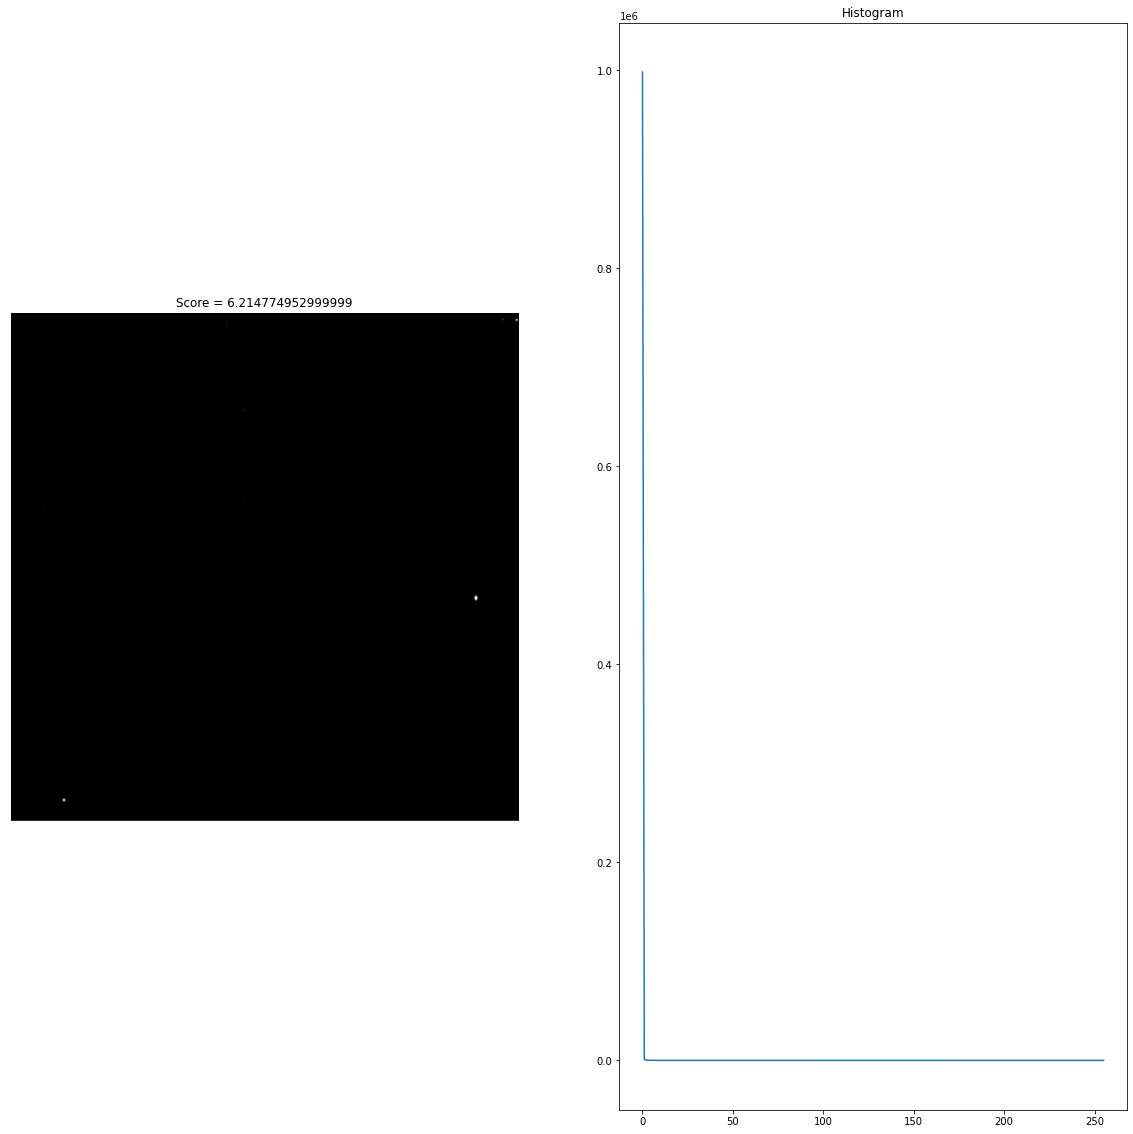

9857551


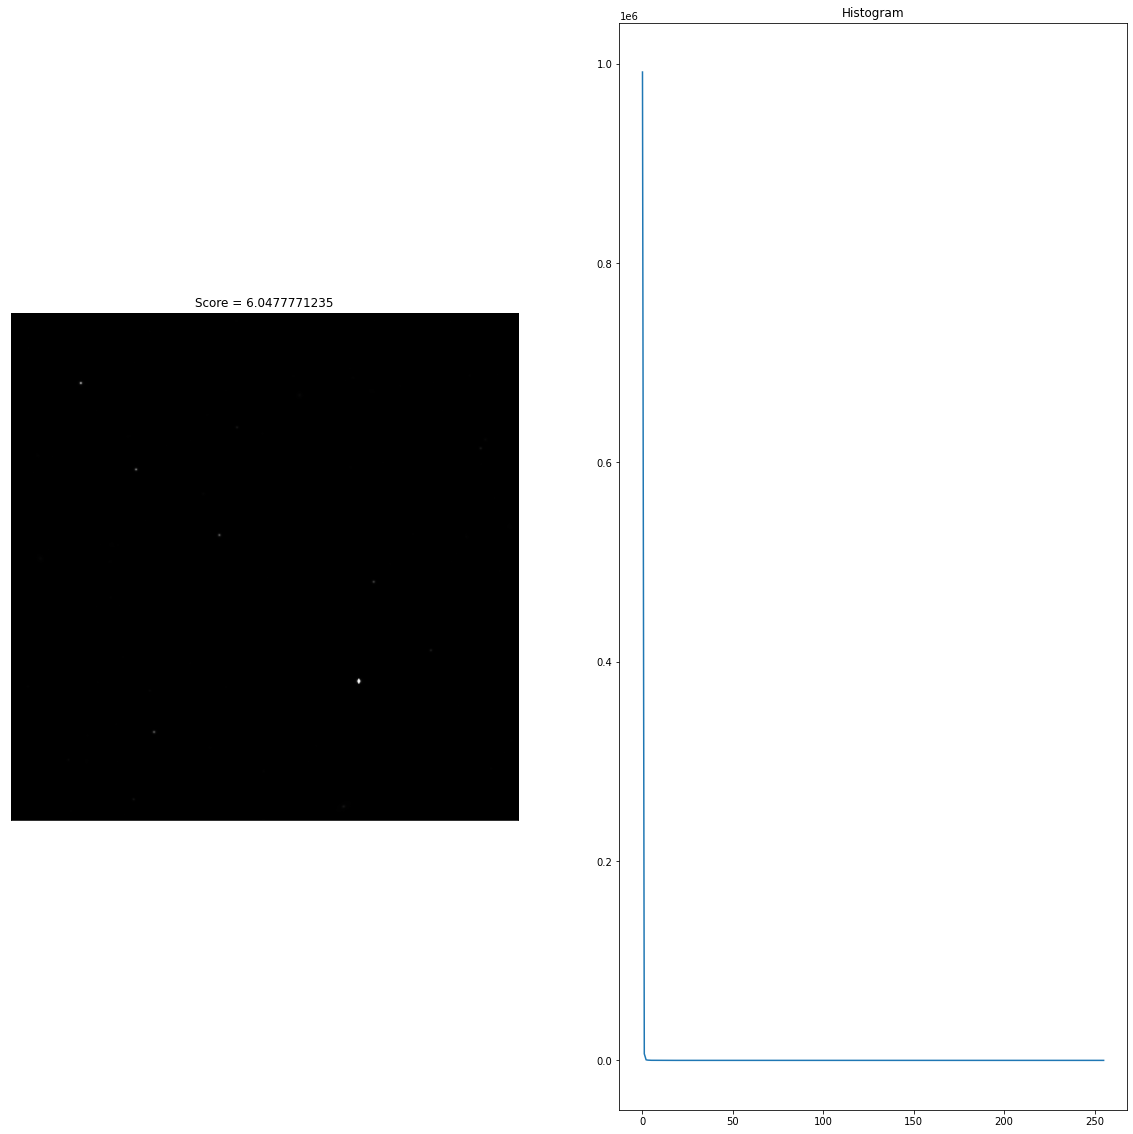

7162322


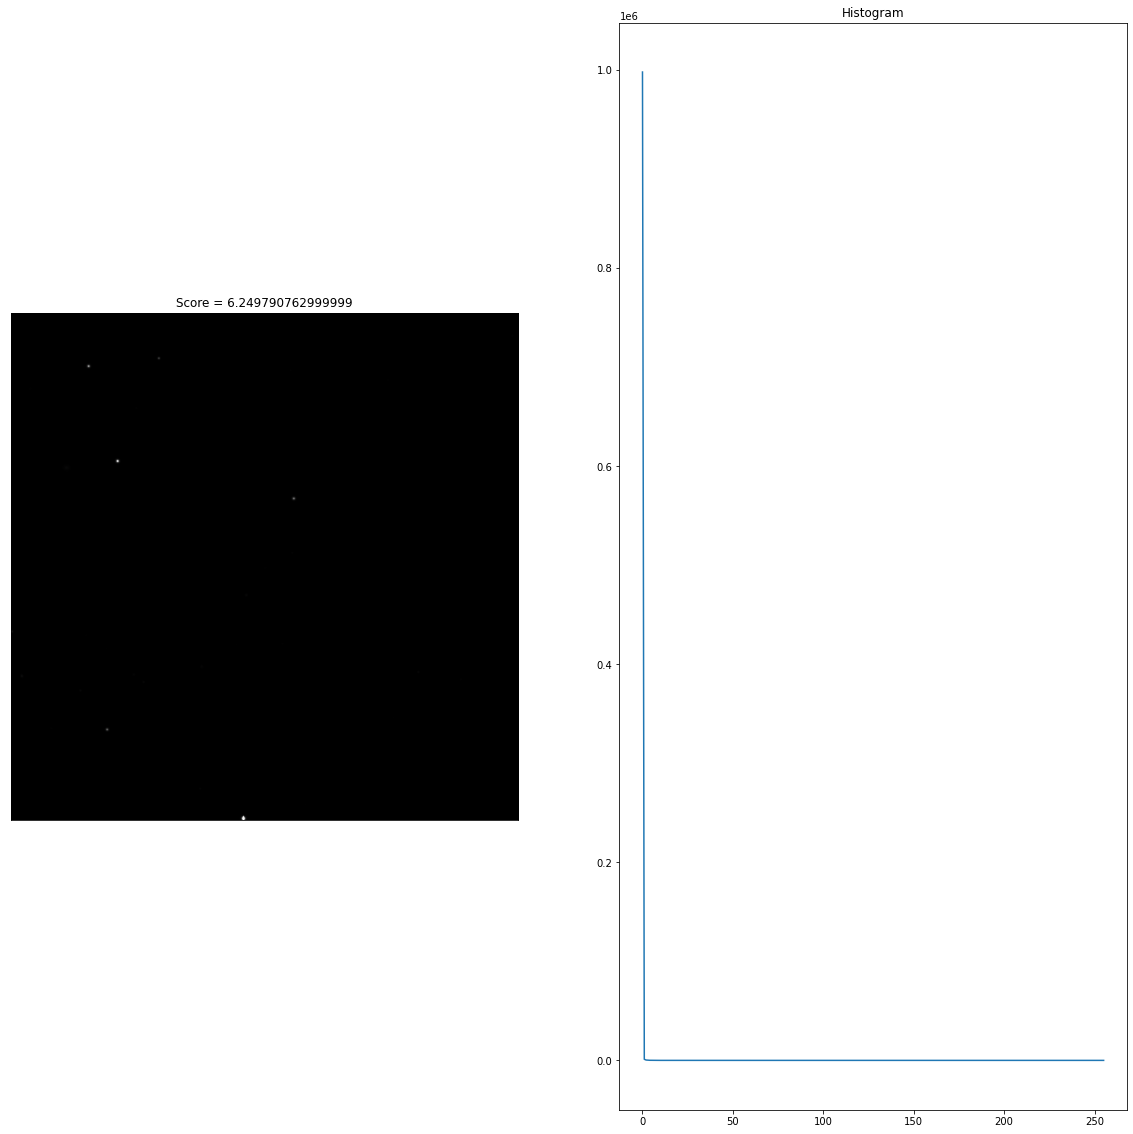

done


In [0]:
for score_thresh in range(7):
  print('=== Score is ', score_thresh)

  # get some images in range [thresh, thresh+1]
  filtered_scores = scores[scores["Actual"] > score_thresh]
  filtered_scores = filtered_scores[filtered_scores["Actual"] < score_thresh+1]
  filtered_scores = filtered_scores[:5] # get only 5 - should be enough
 
  for index, row in filtered_scores.iterrows():
    # image id 
    print(index)
    img_path = os.path.join(path_scored, str(index) + ".png")

    # load image
    img = cv2.imread(img_path, 0)

    # histogram
    hist = cv2.calcHist([img],[0],None,[256],[0,256])

    # plot initial image and corresponding histogram
    plt.figure(figsize=(20, 20))
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Score = ' + str(row["Actual"])), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.plot(hist)
    plt.title('Histogram')

    # uncomment next line to save 
    # plt.savefig(save_path + str(score_thresh) + "_" + str(index))

    plt.show()
    plt.close()

print("done")
    